# ACA data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Information of the river flow stations

| Name                        | Code         | SensorH1 | SensorH2 | Sensor     | Code order | Region         | Province | State     | River              | Basin surface | Y coordinate (UTM ETRS89) | X coordinate (UTM ETRS89) | Subbasin | Municipality            | Basin  | Location                 |
|----------------------------|-----------------|------------|------------|------------|------------|-----------------|-----------|-----------|------------------|--------------------------|---------------------------|---------------------------|----------|----------------------------|--------|--------------------------|
| Torelló_Ges                | F009891         |    3106574 |            | CALC001661 | TA-15      | OSONA           | GIRONA    | En servei | RIU GES          | 88,02 km²                |                   4655539 |                    439144 | ALT TER  | TORELLÓ                    | EL TER | 42.049547207 2.2646119   |
| Masies de Roda             | L08116-72-00002 |    3358431 |    3369214 | CALC001145 | TA-30      | OSONA           | BARCELONA | En servei | RIU TER + GURRI        | 1387,05 km²              |                   4648259 |                    442102 | ALT TER  | MASIES DE RODA, LES        | EL TER | 41.983802 2.302718379    |
| Ripoll                     | L17147-72-00005 |    3358425 |    4277302 | CALC001130 | TA-10      | RIPOLLÈS        | GIRONA    | En servei | RIU TER          | 736,91 km²               |                   4669209 |                    433448 | ALT TER  | RIPOLL                     | EL TER | 42.172192162 2.194229581 |
| Sant Joan de les Abadesses | L17167-72-00001 |    3358409 |    4277304 | CALC001126 | TA-05      | RIPOLLÈS        | GIRONA    | En servei | RIU TER          | 301,02 km²               |                   4674665 |                    437546 | ALT TER  | SANT JOAN DE LES ABADESSES | EL TER | 42.221664291 2.243255294 |
| Anglès                     | F014672         |    3315106 |    3369128 | CALC001512 | TB-10      | SELVA           | GIRONA    | En servei | RIERA D'OSOR     | 88,00 km²                |                   4645530 |                    469379 | BAIX TER | ANGLÈS                     | EL TER | 41.961160899 2.630484738 |
| Ginestar_Llèmena           | F000005         |    4181745 |            | CALC001598 | TB-15      | GIRONÈS         | GIRONA    | En servei | RIERA DE LLEMANA | 77,19 km²                |                   4651536 |                    477269 | BAIX TER | SANT GREGORI               | EL TER | 42.015521388 2.725462811 |
| Campllong_Gotarra          | L17038-72-00002 | 086R01CR   |    3379301 | CALC001175 | TB-25      | GIRONÈS         | GIRONA    | En servei | RIERA GOTARRA    | 100,43 km                |                   4638465 |                    484973 | BAIX TER | CAMPLLONG                  | EL TER | 41.897979761 2.818842216 |
| Girona_Onyar               | L17079-72-00004 | 088R01CR   |    3369181 | CALC001179 | TB-35      | GIRONÈS         | GIRONA    | En servei | RIU ONYAR        | 321,79 km²               |                   4647022 |                    485464 | BAIX TER | GIRONA                     | EL TER | 41.975059495 2.824550321 |
| Riudellots_Onyar           | F026458         | 086R02CR   |    3379302 | CALC001176 | TB-30      | SELVA           | GIRONA    | En servei | RIU ONYAR        | 117,02 km²               |                   4638503 |                    484777 | BAIX TER | RIUDELLOTS DE LA SELVA     | EL TER | 41.898318267 2.816478373 |
| Colomers                   | L17055-72-00002 |    3227966 |            | CALC001201 | TB-45      | BAIX EMPORDÀ    | GIRONA    | En servei | RIU TER          | 2901,95 km²              |                   4658310 |                    499269 | BAIX TER | COLOMERS                   | EL TER | 42.076860022 2.991162733 |
| Girona_Ter                 | L17079-72-00005 | 083R01CR   |    3369186 | CALC001218 | TB-20      | GIRONÈS         | GIRONA    | En servei | RIU TER          | 2257,00 km²              |                   4648705 |                    485021 | BAIX TER | GIRONA                     | EL TER | 41.990209392 2.819160445 |
| Pasteral_Cabal             | F001242         |    4141221 |    4265263 | CALC001543 | TB-05      | SELVA           | GIRONA    | En servei | RIU TER          | 1799,32 km²              |                   4648235 |                    467132 | BAIX TER | AMER                       | EL TER | 41.985432993 2.603218761 |
| Torroella de Montgrí       | L17199-72-00001 |    3235540 |    3379354 | CALC001186 | TB-50      | BAIX EMPORDÀ    | GIRONA    | En servei | RIU TER          | 2948,48 km²              |                   4653688 |                    510378 | BAIX TER | TORROELLA DE MONTGRÍ       | EL TER | 42.035163473 3.125380537 |
| Conellà Terri              | F001243         |    3225389 |            | CALC001660 | TB-40      | PLA DE L'ESTANY | GIRONA    | En servei | RIU TERRI        | 23,78 km²                |                   4660993 |                    483379 | BAIX TER | CORNELLÀ DEL TERRI         | EL TER | 42.100848824 2.798988336 |

## Generate a DataFrame per ACA station (riverflow)

### Union of files for the same station

Most stations' data is provided in two different files that need to be combined:

In [2]:
def readData(file,path):
    df = pd.read_csv(path+file, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm3/s', 'S','V_unitats'] )

    codeStation= df.iloc[0]['V_llocH']
    df["DATA"] = pd.to_datetime(df["DATA"])
    df = df[["DATA", "m3/s"]].set_index('DATA')
    df.rename(columns = {'m3/s':codeStation}, inplace = True)

    return df

def combineTwoFilesPriorizeLeft(fileL,fileR=None,path="./"): 
    data1 = readData(fileL,path)
    data2 = readData(fileR,path)

    return data1.combine_first(data2)

In [3]:
# Combining data from two files
path="rawdata/ACA/flow/"
F014672 = combineTwoFilesPriorizeLeft('Angles_Cabal_REV0_3315106.txt','Angles_Cabal_REV1_3369128.txt', path)
L170387200002 = combineTwoFilesPriorizeLeft('Campllong_Gotarra_Cabal_REV0_086R01CR.txt','Campllong_Gotarra_Cabal_REV1_3379301.txt', path)
L170797200004 = combineTwoFilesPriorizeLeft('Girona_Onyar_REV0_088R01CR.txt','Girona_Onyar_REV1_3369181.txt', path)
L170797200005 = combineTwoFilesPriorizeLeft('Girona_Ter_Cabal_REV0_083R01CR.txt','Girona_Ter_Cabal_REV1_3369186.txt', path)
L081167200002 = combineTwoFilesPriorizeLeft('Masies de Roda_Cabal_REV0_3358431.txt','Masies de Roda_Cabal_REV1_3369214.txt', path)
F001242 = combineTwoFilesPriorizeLeft('Pasteral_Cabal_REV0_4141221.txt','Pasteral_Cabal_REV1_4265263.txt', path)
L171477200005 = combineTwoFilesPriorizeLeft('Ripoll_REV0_Cabal_3358425.txt','Ripoll_REV1_Cabal_4277302.txt', path)
F026458 = combineTwoFilesPriorizeLeft('Riudellots_Onyar_Cabal_REV0_086R02CR.txt','Riudellots_Onyar_Cabal_REV1_3379302.txt', path)
L171677200001 = combineTwoFilesPriorizeLeft('Sant Joan de les Abadesses_Cabal_REV0_3358409.txt','Sant Joan de les Abadesses_Cabal_REV1_4277304.txt', path)
L171997200001 = combineTwoFilesPriorizeLeft('Torroella de Montgri_Cabal_REV0_3235540.txt','Torroella de Montgri_Cabal_REV1_3379354.txt', path)

In [4]:
# Loading data of stations with a single file
L170557200002 = readData('Colomers_REV0_3227966.txt',path)
F001243 = readData('Cornella Terri_Terri_REV0_3225389.txt',path)
F000005 = readData('Ginestar_Llemena_Cabal_REV0_4181745.txt',path)
F009891 = readData('Torello_Ges_Cabal_REV0_3106574.txt',path)

In [5]:
# exemple:
L170797200005

L17079-72-00005
DATA                                
2009-01-01 00:00:00         8.677000
2009-01-01 00:05:00         8.677000
2009-01-01 00:10:00         8.771000
2009-01-01 00:15:00         8.865000
2009-01-01 00:20:00         8.865000
...                              ...
2022-02-01 23:35:00         4.598098
2022-02-01 23:40:00         4.598098
2022-02-01 23:45:00         4.622745
2022-02-01 23:50:00         4.598098
2022-02-01 23:55:00         4.622745

[1234456 rows x 1 columns]

<AxesSubplot:xlabel='DATA'>

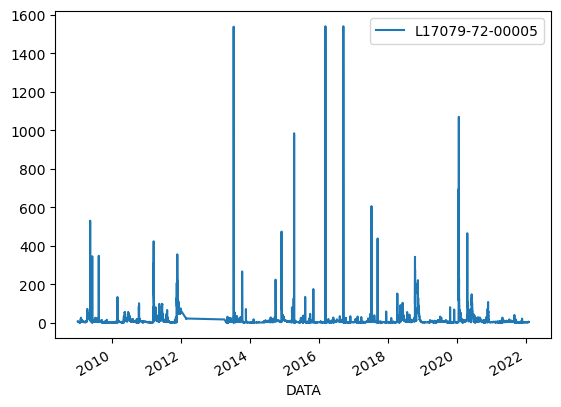

In [6]:
L170797200005.plot()

Now we create the dataframe with all the stations:

In [7]:
ArrayWithStations = [F014672,L170387200002,L170797200004,L170797200005,L081167200002,F001242,L171477200005,F026458,L171677200001,L171997200001,L170557200002,F001243,F000005,F009891]

In [8]:
# This will be a dataframe with all the stations
df = pd.DataFrame({'DATA':pd.date_range('2009/01/01', '2022/02/02', freq='5min')}).set_index('DATA')
# add all the other stations
for station in ArrayWithStations:
    df = df.join(station, how='left')

In [9]:
df=df.resample("30T").mean()

In [10]:
df.to_excel("rawdata/ACA/auxdf/df_riverflow_no_preproc.xlsx")

## Generate a DataFrame per ACA station (height)

### Union of files for the same station


In [11]:
def readData(file,path,rename=None):
    df = pd.read_csv(path+file, sep='|',encoding= 'unicode_escape',names =['DATA', 'V_llocH', 'V_sensorH', 'm', 'S','V_unitats'] )

    codeStation= df.iloc[0]['V_llocH']
    df["DATA"] = pd.to_datetime(df["DATA"])
    if rename is not None:
        codeStation=rename
    df = df[["DATA", "m"]].set_index('DATA')
    df.rename(columns = {'m':codeStation}, inplace = True)

    return df
def combineTwoFilesPriorizeLeft(fileL,fileR=None,path="./",rename=False): 
    data1 = readData(fileL,path)
    stationname = data1.columns[0]
    if not rename:
        stationname=None
    data2 = readData(fileR,path,stationname)

    return data1.combine_first(data2)


In [12]:
# Combining data from two files
path = "rawdata/ACA/height/"
F014672 = combineTwoFilesPriorizeLeft('Angles_Nivell_REV0_3315105.txt','Angles_Nivell_REV1_3369127.txt', path)
L170387200002 = combineTwoFilesPriorizeLeft('Campllong_Gotarra_Nivell_REV0_086R01NR.txt','Campllong_Gotarra_Nivell_REV1_3379299.txt', path)
L170797200004 = combineTwoFilesPriorizeLeft('Girona_Onyar_Nivell_REV0_088R01NR.txt','Girona_Onyar_Nivell_REV1_3369182.txt', path)
L170797200005 = combineTwoFilesPriorizeLeft('Girona_Ter_Nivell_REV0_083R01NR.txt','Girona_Ter_Nivell_REV1_3369187.txt', path)
L081167200002 = combineTwoFilesPriorizeLeft('Masies de Roda_Nivell_REV1_3369215.txt','Masies de Roda_Nivell_REV0_071R02NR.txt', path, True)
F001242 = combineTwoFilesPriorizeLeft('Pasteral_Nivell_REV0_4259494.txt','Pasteral_Nivell_REV1_4259847.txt', path)
L171477200005 = combineTwoFilesPriorizeLeft('Ripoll_Nivell_REV0_060R01NR_1.txt','Ripoll_Nivell_REV1_3369247.txt', path)
F026458 = combineTwoFilesPriorizeLeft('Riudellots_Onyar_Nivell_REV0_086R02NR.txt','Riudellots_Onyar_Nivell_REV1_3379300.txt', path)
L171677200001 = combineTwoFilesPriorizeLeft('Sant Joan de les Abadesses_Nivell_REV0_055R01NR_1.txt','Sant Joan de les Abadesses_Nivell_REV1_3379340_2.txt', path)
L171997200001 = combineTwoFilesPriorizeLeft('Torroella de Montgri_Nivell_REV0_3358786.txt','Torroella de Montgri_Nivell_REV1_4167482.txt', path)

In [13]:
# Carreguem els que nomès són un fitxer 
L170557200002 = readData('Colomers_Nivell_REV0_3225357.txt', path)
F001243 = readData('Cornella Terri_Terri_REV0_Nivell_3100399.txt', path)
F000005 = readData('Ginestar_Llemena_Nivell_REV0_3100395.txt', path)
F009891 = readData('Torello_Ges_Nivell_REV0_3104557.txt', path)

In [14]:
ArrayWithStations = [F014672,L170387200002,L170797200004,L170797200005,L081167200002,F001242,L171477200005,F026458,L171677200001,L171997200001,L170557200002,F001243,F000005,F009891]

Now we create the dataframe with all the stations:

In [15]:
# This will be a dataframe with all the stations
df_height = pd.DataFrame({'DATA':pd.date_range('2009/01/01', '2022/02/02', freq='5min')}).set_index('DATA')
# add all the other stations
for station in ArrayWithStations:
    df_height = df_height.join(station, how='left')

In [16]:
df_height=df_height.resample("30T").mean()

In [17]:
df_height

F014672  L17038-72-00002  L17079-72-00004  \
DATA                                                             
2009-01-01 00:00:00      NaN         0.565333         0.480000   
2009-01-01 00:30:00      NaN         0.564000         0.480000   
2009-01-01 01:00:00      NaN         0.562000         0.480000   
2009-01-01 01:30:00      NaN         0.560000         0.480000   
2009-01-01 02:00:00      NaN         0.556000         0.478667   
...                      ...              ...              ...   
2022-02-01 22:00:00      NaN              NaN              NaN   
2022-02-01 22:30:00      NaN              NaN              NaN   
2022-02-01 23:00:00      NaN              NaN              NaN   
2022-02-01 23:30:00      NaN              NaN              NaN   
2022-02-02 00:00:00      NaN              NaN              NaN   

                     L17079-72-00005  L08116-72-00002   F001242  \
DATA                                                              
2009-01-01 00:00:00         0.853333         1.326333  0.543167   
2009-01-01 00:30:00         0.855000         1.326500  0.543167   
2009-01-01 01:00:00         0.855000         1.327667  0.543000   
2009-01-01 01:30:00         0.855000         1.330000  0.543000   
2009-01-01 02:00:00         0.853000         1.332500  0.543000   
...                              ...              ...       ...   
2022-02-01 22:00:00         0.761667              NaN       NaN   
2022-02-01 22:30:00         0.762333              NaN       NaN   
2022-02-01 23:00:00         0.762500              NaN       NaN   
2022-02-01 23:30:00         0.762500              NaN       NaN   
2022-02-02 00:00:00              NaN              NaN       NaN   

                     L17147-72-00005   F026458  L17167-72-00001  \
DATA                                                              
2009-01-01 00:00:00         0.727000  0.331000           1.1130   
2009-01-01 00:30:00         0.727667  0.331000           1.1125   
2009-01-01 01:00:00         0.727000  0.331000           1.1120   
2009-01-01 01:30:00         0.727000  0.330333           1.1115   
2009-01-01 02:00:00         0.727000  0.329000           1.1110   
...                              ...       ...              ...   
2022-02-01 22:00:00              NaN       NaN              NaN   
2022-02-01 22:30:00              NaN       NaN              NaN   
2022-02-01 23:00:00              NaN       NaN              NaN   
2022-02-01 23:30:00              NaN       NaN              NaN   
2022-02-02 00:00:00              NaN       NaN              NaN   

                     L17199-72-00001  L17055-72-00002  F001243  F000005  \
DATA                                                                      
2009-01-01 00:00:00              NaN        -0.092167   0.4324   0.2487   
2009-01-01 00:30:00              NaN        -0.016667   0.4324   0.2512   
2009-01-01 01:00:00              NaN        -0.090833   0.4286   0.2512   
2009-01-01 01:30:00              NaN        -0.090833   0.4286   0.2512   
2009-01-01 02:00:00              NaN        -0.020167   0.4286   0.2512   
...                              ...              ...      ...      ...   
2022-02-01 22:00:00              NaN              NaN      NaN      NaN   
2022-02-01 22:30:00              NaN              NaN      NaN      NaN   
2022-02-01 23:00:00              NaN              NaN      NaN      NaN   
2022-02-01 23:30:00              NaN              NaN      NaN      NaN   
2022-02-02 00:00:00              NaN              NaN      NaN      NaN   

                     F009891  
DATA                          
2009-01-01 00:00:00    0.724  
2009-01-01 00:30:00    0.722  
2009-01-01 01:00:00    0.719  
2009-01-01 01:30:00    0.711  
2009-01-01 02:00:00    0.706  
...                      ...  
2022-02-01 22:00:00      NaN  
2022-02-01 22:30:00      NaN  
2022-02-01 23:00:00      NaN  
2022-02-01 23:30:00      NaN  
2022-02-02 00:00:00      NaN  

[229441 rows x 14 columns]

In [18]:
df_height.to_excel("rawdata/ACA/auxdf/df_river_height_no_preproc.xlsx")

## Data preprocessing

In [3]:
flow = pd.read_excel("rawdata/ACA/auxdf/df_riverflow_no_preproc.xlsx", index_col=0)

In [4]:
# percentage of null values
np.sum(flow.isna(),axis=0)/flow.shape[0]

F014672            0.570691
L17038-72-00002    0.104824
L17079-72-00004    0.041601
L17079-72-00005    0.101403
L08116-72-00002    0.412873
F001242            0.086057
L17147-72-00005    0.117538
F026458            0.105953
L17167-72-00001    0.134462
L17199-72-00001    0.048989
L17055-72-00002    0.245457
F001243            0.779255
F000005            0.946282
F009891            0.750698
dtype: float64

In [5]:
# stations with > 1/2 missing values
del flow["F001243"]
del flow["F000005"]
del flow["F009891"]
del flow["F014672"]
# station situated near the river's mouth (out of the scope of the study)
del flow["L17199-72-00001"]

In [6]:
flow.describe()

L17038-72-00002  L17079-72-00004  L17079-72-00005  L08116-72-00002  \
count    205390.000000    219896.000000    206175.000000    134711.000000   
mean          2.550214         1.354280        11.374266        14.850580   
std           4.065877        16.154270        25.516501        29.574063   
min           0.000000         0.001000         0.000000        -3.461000   
25%           1.024667         0.152667         3.512067         5.755417   
50%           2.086667         0.291000         5.528000         9.174000   
75%           3.246000         0.524000         8.927633        15.229083   
max         133.279666       542.000000      1540.000000      1577.793667   

             F001242  L17147-72-00005        F026458  L17167-72-00001  \
count  209696.000000    202473.000000  205131.000000    198590.000000   
mean       11.474803        18.881317       0.313397         6.862589   
std        19.298589       225.384491       2.630047        77.058052   
min         0.000000         0.000000       0.000000         0.000000   
25%         5.206833         4.235436       0.000000         1.868667   
50%         8.163583         6.993833       0.000000         3.214500   
75%        13.447542        12.100333       0.368833         5.537000   
max      1211.289998      7806.362667     269.005333      5065.316500   

       L17055-72-00002  
count    173123.000000  
mean         19.813384  
std          41.267468  
min          -1.000000  
25%          10.842833  
50%          13.257333  
75%          16.891667  
max        2335.000000

In [7]:
# remove nonsense negative values
flow[flow<0] = np.nan

In [8]:
height = pd.read_excel("rawdata/ACA/auxdf/df_river_height_no_preproc.xlsx", index_col=0)

In [9]:
# percentage of null values
np.sum(height.isna(),axis=0)/height.shape[0]

F014672            0.553720
L17038-72-00002    0.104227
L17079-72-00004    0.040930
L17079-72-00005    0.100762
L08116-72-00002    0.296176
F001242            0.548442
L17147-72-00005    0.010412
F026458            0.104881
L17167-72-00001    0.014614
L17199-72-00001    0.232840
L17055-72-00002    0.195885
F001243            0.776370
F000005            0.743285
F009891            0.739218
dtype: float64

In [10]:
# stations with > 1/2 missing values
del height["F001243"]
del height["F000005"]
del height["F009891"]
del height["F014672"]
# station situated near the river's mouth (out of the scope of the study)
del height["L17199-72-00001"]

In [11]:
height.describe()

L17038-72-00002  L17079-72-00004  L17079-72-00005  L08116-72-00002  \
count    205527.000000    220050.000000    206322.000000    161486.000000   
mean          0.426268         0.406979         0.810119         1.069869   
std           0.236935         0.248317         0.186146         0.209821   
min          -1.756430        -1.641350        -1.505548        -1.251250   
25%           0.311165         0.358188         0.690687         0.993294   
50%           0.407803         0.384215         0.770323         1.058422   
75%           0.512153         0.422369         0.863730         1.140449   
max           4.903910         6.173700         4.043438         4.152227   

             F001242  L17147-72-00005        F026458  L17167-72-00001  \
count  103606.000000    227052.000000  205377.000000    226088.000000   
mean        0.803775         0.390417       0.079101         0.939843   
std         0.402916         0.342498       0.233904         0.170722   
min        -1.252680        -0.321177      -2.255707        -3.008737   
25%         0.591333         0.138607      -0.014257         0.847547   
50%         0.667917         0.297228      -0.011180         0.957642   
75%         0.810000         0.542507       0.151143         1.042000   
max         9.348700         7.875995       5.202387         3.142137   

       L17055-72-00002  
count    184497.000000  
mean          0.106482  
std           0.194870  
min          -1.252150  
25%           0.059128  
50%           0.074980  
75%           0.109822  
max           4.818552

In [12]:
# remove nonsense negative values
height[height<0] = np.nan

/Users/momo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


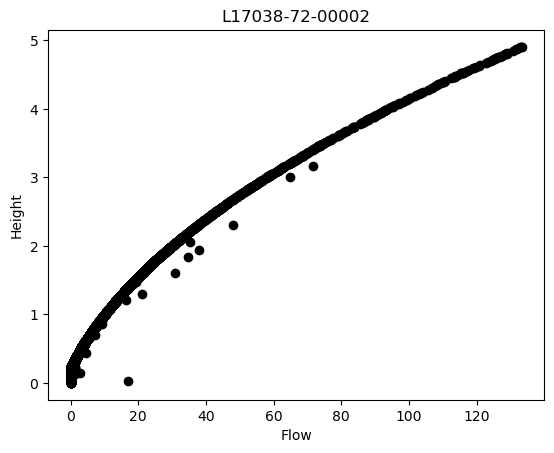

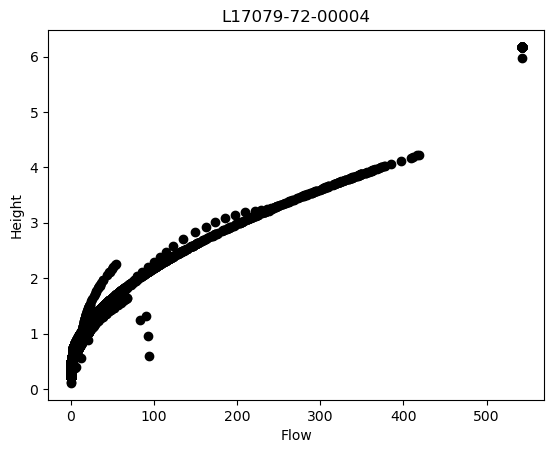

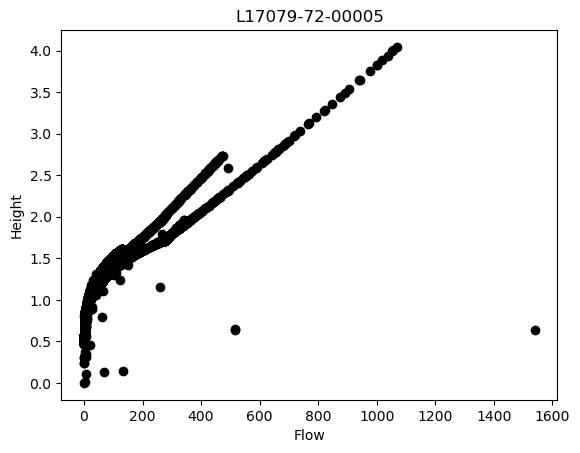

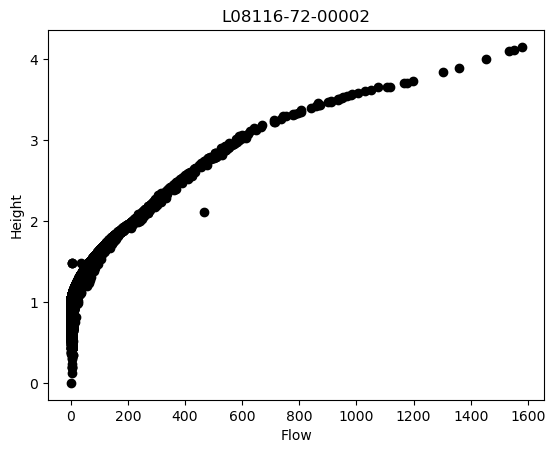

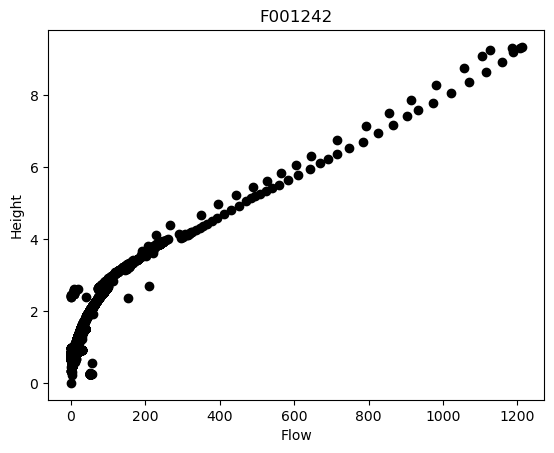

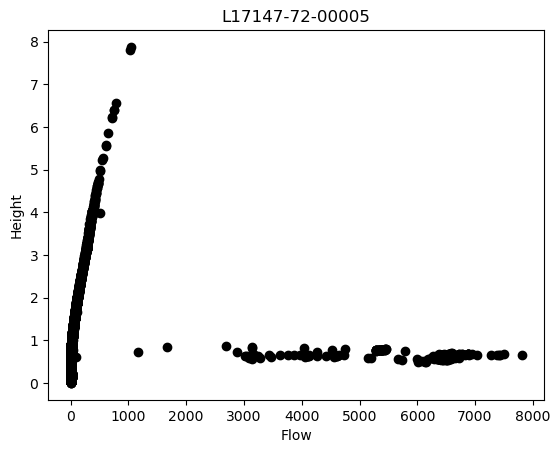

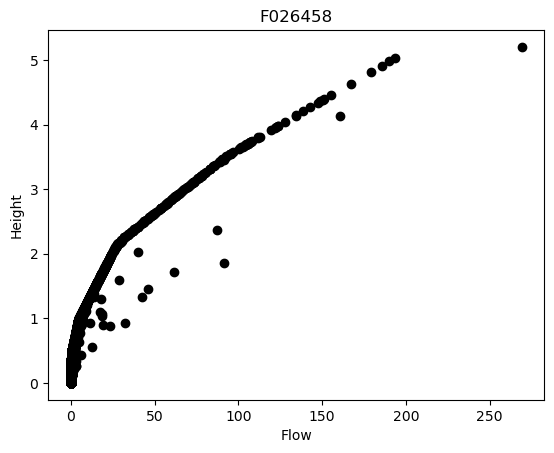

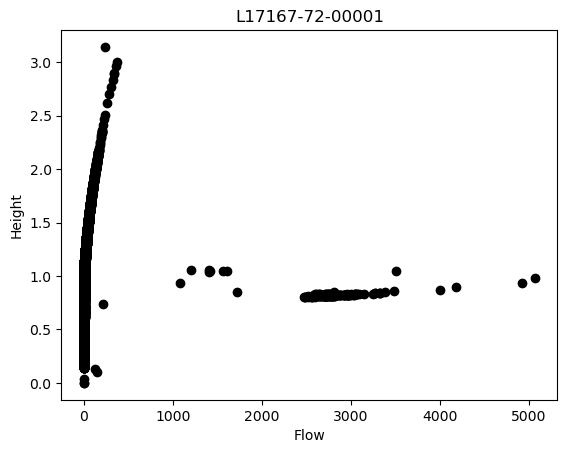

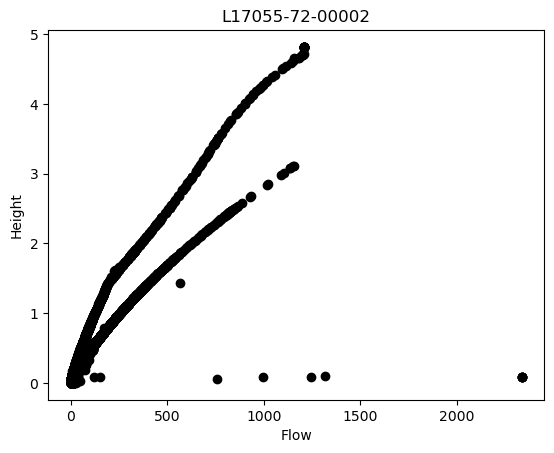

In [13]:
for stationName in flow.columns:
    
    df = flow[[stationName]]
    df2 = height[[stationName]]
    
    df.rename(columns = {stationName : stationName+"_flow"}, inplace = True)
    df2.rename(columns = {stationName : stationName+"_height"}, inplace = True)

    df = df.combine_first(df2)
    df.dropna(inplace = True)
    
    plt.title(stationName)
    plt.xlabel('Flow')
    plt.ylabel('Height')
    plt.scatter(df.iloc[:, 0].values, df.iloc[:, 1].values, color="black")
    plt.show()

In [14]:
# removing nonsense values by hand
station = "L17167-72-00001"
flow[flow[station]>500]=np.nan

station = "L17147-72-00005"
flow[np.logical_and(flow[station]>1000, height[station]<1)]=np.nan

station = "L17055-72-00002"
flow[np.logical_and(flow[station]>500, height[station]<1)]=np.nan

In [15]:
# percentage of null values
np.sum(flow.isna(),axis=0)/flow.shape[0]

L17038-72-00002    0.106733
L17079-72-00004    0.043510
L17079-72-00005    0.103312
L08116-72-00002    0.416656
F001242            0.087966
L17147-72-00005    0.119403
F026458            0.107862
L17167-72-00001    0.136331
L17055-72-00002    0.247475
dtype: float64

In [16]:
np.sum(height.isna(),axis=0)/height.shape[0]

L17038-72-00002    0.104903
L17079-72-00004    0.045798
L17079-72-00005    0.101046
L08116-72-00002    0.298142
F001242            0.548516
L17147-72-00005    0.013306
F026458            0.578105
L17167-72-00001    0.014923
L17055-72-00002    0.212900
dtype: float64

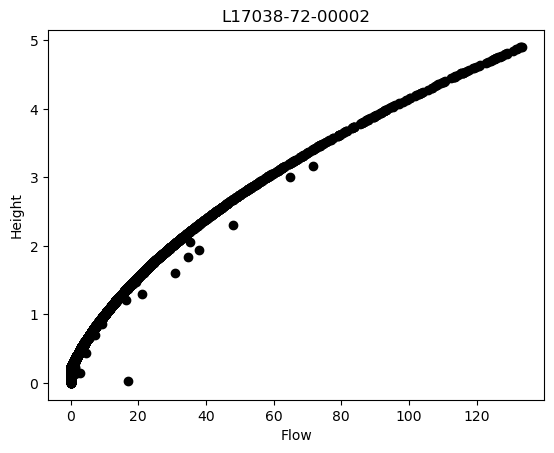

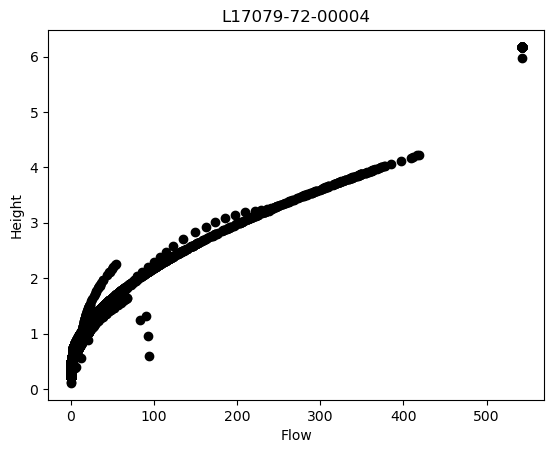

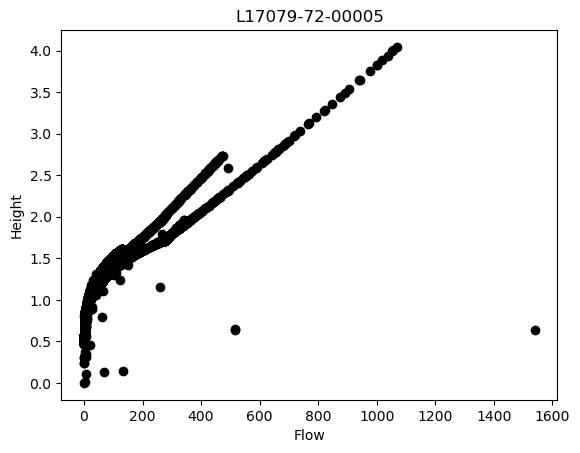

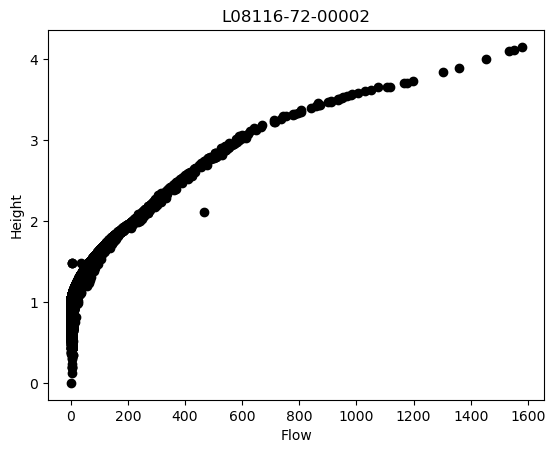

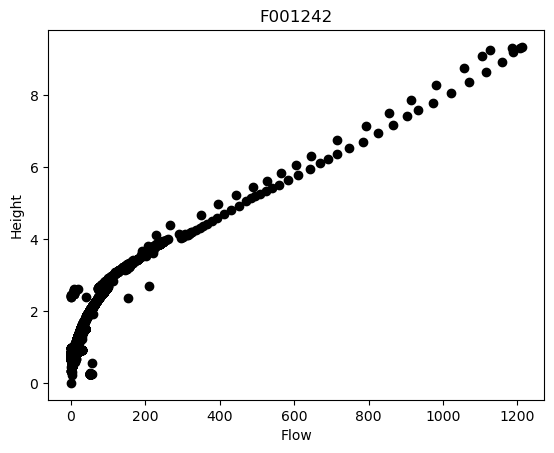

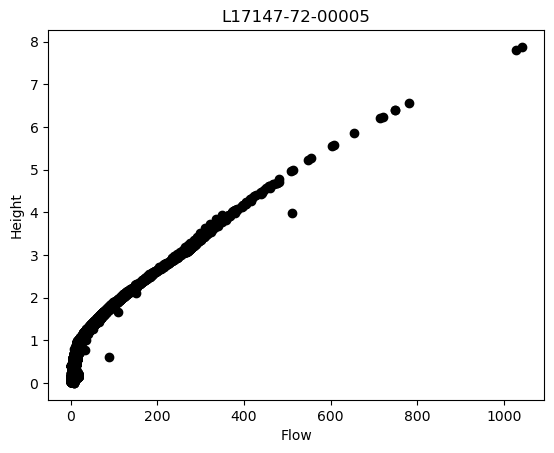

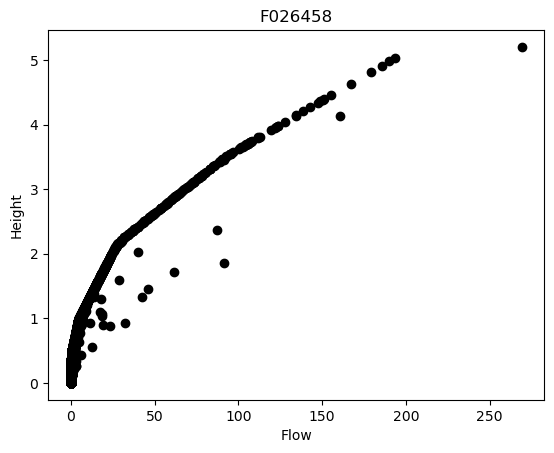

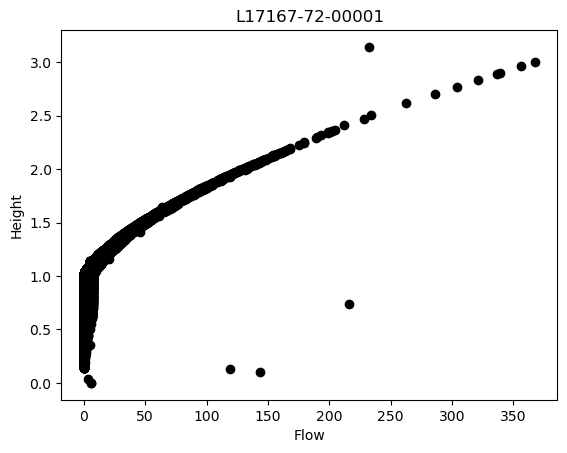

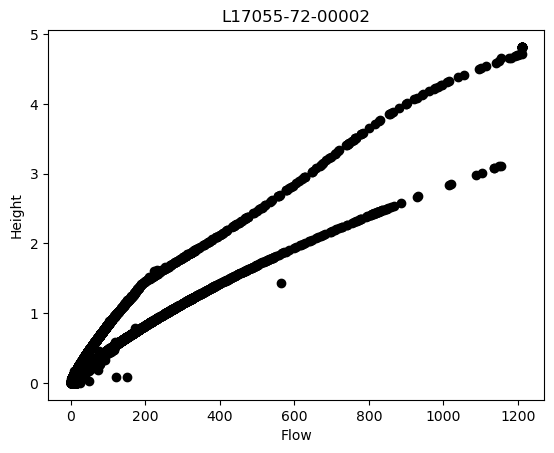

In [17]:
for stationName in flow.columns:
    
    df = flow[[stationName]]
    df2 = height[[stationName]]
    
    df.rename(columns = {stationName : stationName+"_flow"}, inplace = True)
    df2.rename(columns = {stationName : stationName+"_height"}, inplace = True)

    df = df.combine_first(df2)
    df.dropna(inplace = True)
    
    plt.title(stationName)
    plt.xlabel('Flow')
    plt.ylabel('Height')
    plt.scatter(df.iloc[:, 0].values, df.iloc[:, 1].values, color="black")
    plt.show()

## Applying moving average to detect outliers

In [4]:
#flow = pd.read_excel("rawdata/ACA/auxdf/df_riverflow_smallGapsInterpolated.xlsx", index_col=0)
#height = pd.read_excel("rawdata/ACA/auxdf/df_river_height_smallGapsInterpolated.xlsx", index_col=0)

In [45]:
def largerthan(vec, sdorder=2):
    counts_na = np.sum(np.isnan(vec))
    mig = len(vec)//2
    if counts_na < mig:
        aux = vec[mig]
        vec[mig] = np.nan
        xm = np.mean(vec)
        sd = np.std(vec)

        if aux <= xm + sdorder * sd and aux >= xm - sdorder * sd:
            vec[mig] = aux
    return vec[mig]

In [20]:
win_size=25

flowAux = flow.copy()
for stationName in flow.columns:
    print(stationName)
    df = flowAux[[stationName]]
    # detect and remove outliers
    smoothed = df.rolling(window = win_size, center=True, min_periods=win_size//2+1).apply(largerthan)
    smoothed[:win_size//2] = df[:win_size//2]
    smoothed[-win_size//2+1:] = df[-win_size//2+1:]
    flowAux[[stationName]] = smoothed
    # fill in left gaps
    #flowAux = interpolateGapsValue(stationName,flowAux,win_size)

L17038-72-00002
L17079-72-00004
L17079-72-00005
L08116-72-00002
F001242
L17147-72-00005
F026458
L17167-72-00001
L17055-72-00002


In [21]:
win_size=25

heightAux = height.copy()
for stationName in height.columns:
    print(stationName)
    df = heightAux[[stationName]]
    # detect and remove outliers
    smoothed = df.rolling(window = win_size, center=True, min_periods=win_size//2+1).apply(largerthan)
    smoothed[:win_size//2] = df[:win_size//2]
    smoothed[-win_size//2+1:] = df[-win_size//2+1:]
    heightAux[[stationName]] = smoothed
    # fill in left gaps
    #heightAux = interpolateGapsValue(stationName,heightAux,win_size)

L17038-72-00002
L17079-72-00004
L17079-72-00005
L08116-72-00002
F001242
L17147-72-00005
F026458
L17167-72-00001
L17055-72-00002


In [9]:
def dfFlowHeightForStation(f,h,stationName):
    df = f[[stationName]]
    df2 = h[[stationName]]

    df.rename(columns = {stationName : stationName+"_flow"}, inplace = True)
    df2.rename(columns = {stationName : stationName+"_height"}, inplace = True)

    df = df.combine_first(df2)
    df.dropna(inplace = True)
    return df
    
def plotSideBySide(f1,h1,f2,h2,stationName,labels):
    dfs = [dfFlowHeightForStation(f1,h1,stationName),
           dfFlowHeightForStation(f2,h2,stationName)]

    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    for i in np.arange(2):
        axes[i].set_title(stationName+" "+labels[i])
        axes[i].set_xlabel('Flow')
        axes[i].set_ylabel('Height')
        axes[i].scatter(dfs[i].iloc[:, 0].values, dfs[i].iloc[:, 1].values, color="black")
    plt.show()

In [35]:
# removing nonsense values by hand
station = "L17079-72-00004"
flowAux[station]["2020-07-24 15:00:00":"2020-07-27 09:00:00"] = np.nan
heightAux[station]["2020-07-24 15:00:00":"2020-07-27 09:00:00"] = np.nan

station = "L17079-72-00005"
extreme=np.where(np.logical_and(flowAux[station]>400, heightAux[station]<1))[0]
flowAux[station][extreme] = np.nan

station = "L17147-72-00005"
flowAux[station]["2019-05-16 11:00:00":"2019-05-16 13:00:00"] = np.nan
heightAux[station]["2019-05-16 11:00:00":"2019-05-16 13:00:00"] = np.nan

station = "F026458"
points = ["2018-06-01 07:00:00", "2018-06-01 10:30:00", "2018-06-18 08:00:00", "2018-06-18 08:30:00", "2019-07-19 10:30:00"]
flowAux[station][points] = np.nan
heightAux[station][points] = np.nan

station = "L17167-72-00001"
flowAux[station]["2018-02-21 12:00:00":"2018-02-21 14:30:00"] = np.nan
heightAux[station]["2018-02-21 12:00:00":"2018-02-21 14:30:00"] = np.nan

stationName = "F001242"
height[stationName][193854:193856] = np.nan

stationName = "F001242"
flow[stationName].loc["2020-01-27 00:00:00":"2020-01-27 11:30:00"] = np.nan

stationName = "F001242"
height[stationName].loc["2020-01-29 00:00:00":"2020-01-30 16:00:00"] = np.nan

In [70]:
# we cannot have positive values (>0) for one of the measures, and 0 for the other.
for stationName in flowAux.columns:
    casA = np.logical_and(flowAux[stationName]==0, heightAux[stationName] > 0)
    if np.sum(casA)>0:
        flowAux[stationName][casA] = np.nan
    casB = np.logical_and(flowAux[stationName]>0, heightAux[stationName] == 0)
    if np.sum(casB)>0:
        heightAux[stationName][casB] = np.nan
    #perc_change = np.sum(mask)/n_miss
    print(stationName, np.sum(casA), np.sum(casB))

L17038-72-00002 0 0
L17079-72-00004 0 0
L17079-72-00005 0 0
L08116-72-00002 0 0
F001242 0 0
L17147-72-00005 0 0
F026458 0 0
L17167-72-00001 0 0
L17055-72-00002 0 0


In [6]:
stationName="L17038-72-00002"
inds = np.where(np.logical_and(flowAux[stationName]==0, heightAux[stationName].isnull()))[0]
flowAux[stationName].iloc[inds] = np.nan

stationName="L17079-72-00005"
flowAux[stationName].iloc[156934] = np.nan

stationName="L17079-72-00005"
flowAux[stationName].iloc[89603:89683] = np.nan
flowAux[stationName].iloc[89602:89684].interpolate(inplace=True)
heightAux[stationName].iloc[89603:89683] = np.nan
heightAux[stationName].iloc[89602:89684].interpolate(inplace=True)

stationName="L08116-72-00002"
heightAux[stationName].iloc[26178:26189] = np.nan
heightAux[stationName].iloc[26177:26190].interpolate(inplace=True)
heightAux[stationName].iloc[9668:9671] = np.nan
heightAux[stationName].iloc[9667:9672].interpolate(inplace=True)
heightAux[stationName].iloc[9357:9428] = np.nan
heightAux[stationName].iloc[9356:9429].interpolate(inplace=True)

stationName="F001242"
flowAux[stationName].iloc[[7366,   9755,   9757,   9758,  10381]] = np.nan
flowAux[stationName].iloc[10711:10728] = np.nan
flowAux[stationName].iloc[10710:10729].interpolate(inplace=True)
heightAux[stationName].iloc[10721:10728].interpolate(inplace=True)
inds = np.where(np.logical_and(flowAux[stationName]==0, heightAux[stationName].isnull()))[0]
flowAux[stationName].iloc[inds] = np.nan

stationName="L17147-72-00005"
inds = np.where(np.logical_and(flowAux[stationName].isnull(), heightAux[stationName] == 0))[0]
flowAux[stationName].iloc[inds] = 0

stationName="F026458"
inds = np.where(np.logical_and(flowAux[stationName]==0, heightAux[stationName].isnull()))[0]
flowAux[stationName].iloc[inds] = np.nan

stationName="L17167-72-00001"
inds = np.where(np.logical_and(flowAux[stationName]==0, heightAux[stationName].isnull()))[0]
flowAux[stationName].iloc[inds] = np.nan

stationName="L17055-72-00002"
inds = np.where(np.logical_and(flowAux[stationName]==0, heightAux[stationName].isnull()))[0]
flowAux[stationName].iloc[inds] = np.nan

In [7]:
# we cannot have positive values (>0) for one of the measures, and 0 for the other.
for stationName in flowAux.columns:
    casA = np.logical_and(flowAux[stationName]==0, heightAux[stationName].isnull())
    casB = np.logical_and(flowAux[stationName].isnull(), heightAux[stationName] == 0)
    print(stationName, np.sum(casA), np.sum(casB))

L17038-72-00002 0 0
L17079-72-00004 0 0
L17079-72-00005 0 0
L08116-72-00002 0 0
F001242 0 0
L17147-72-00005 0 0
F026458 0 0
L17167-72-00001 0 0
L17055-72-00002 0 0


/Users/momo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


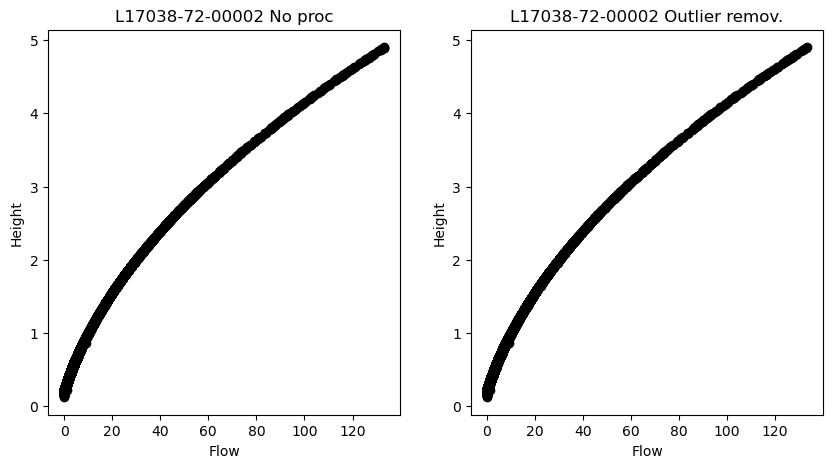

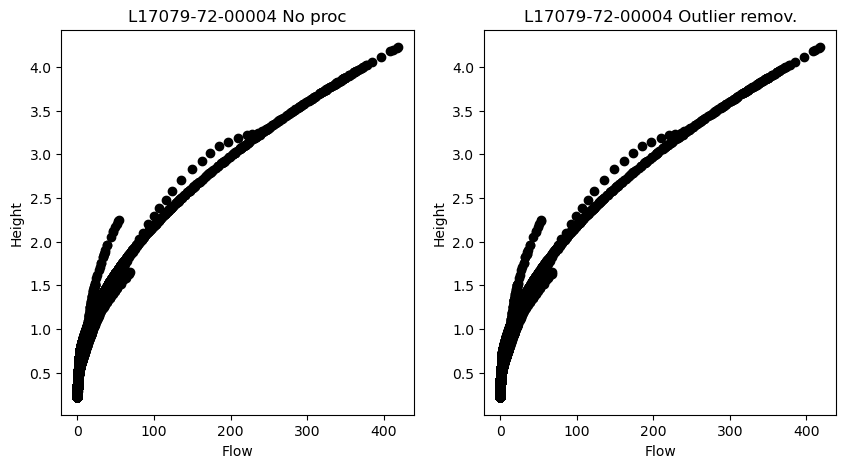

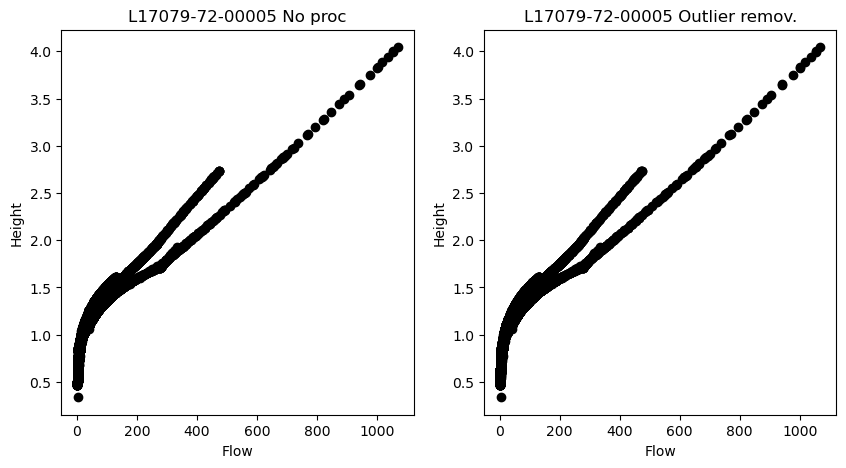

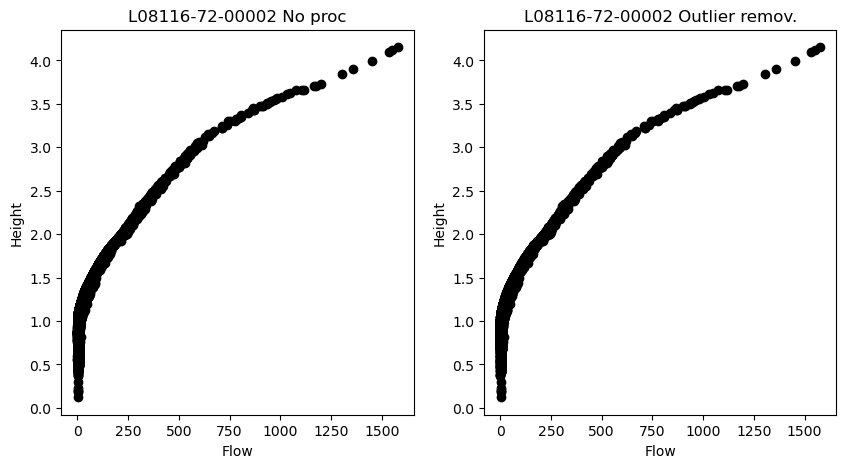

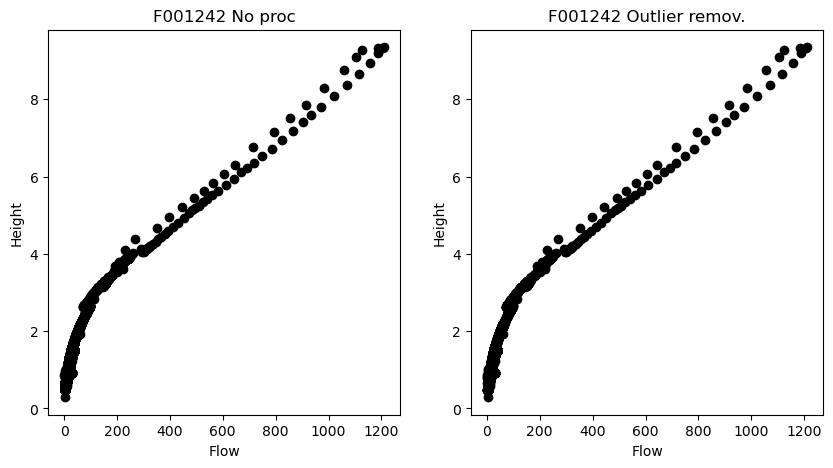

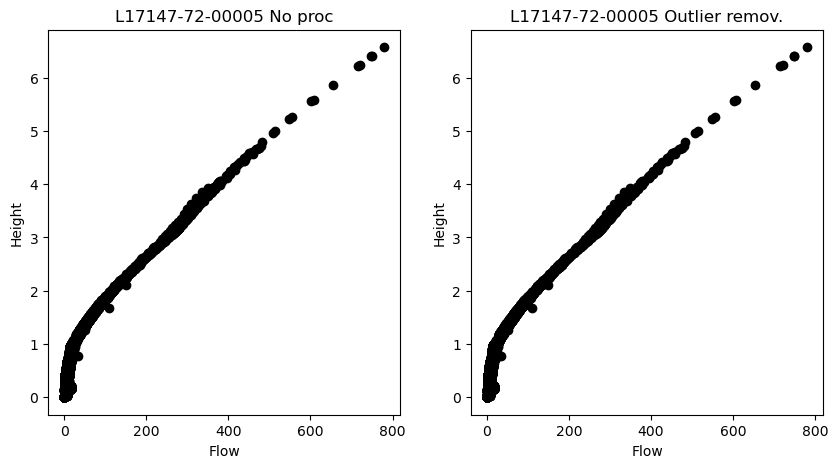

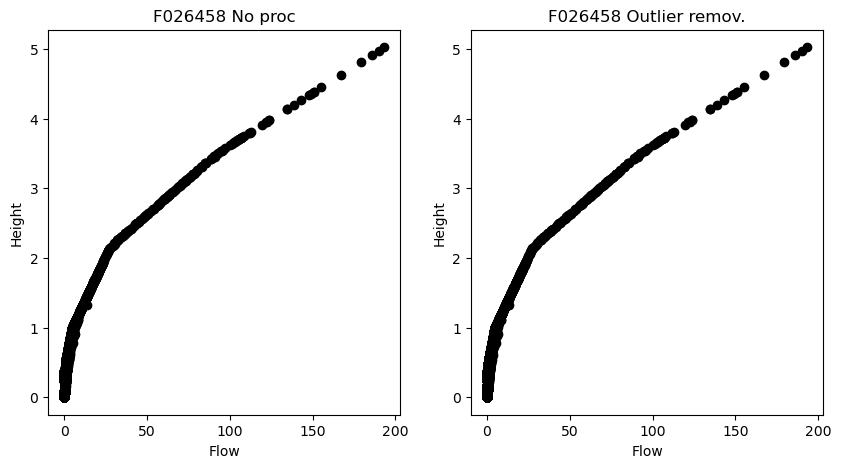

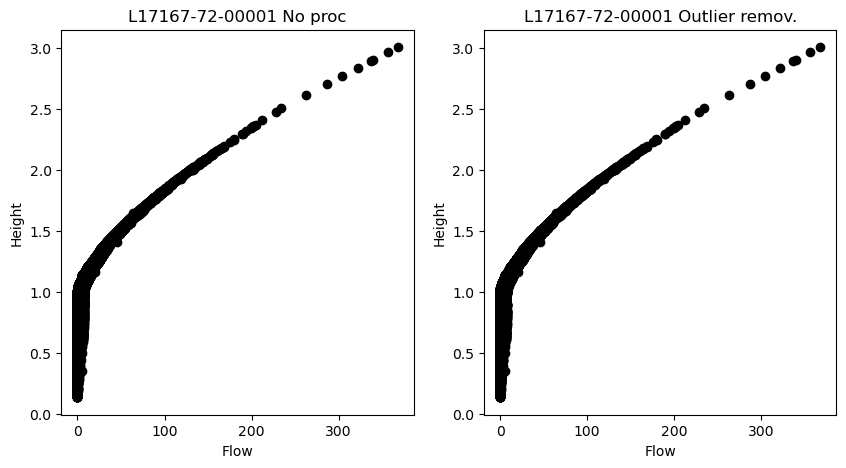

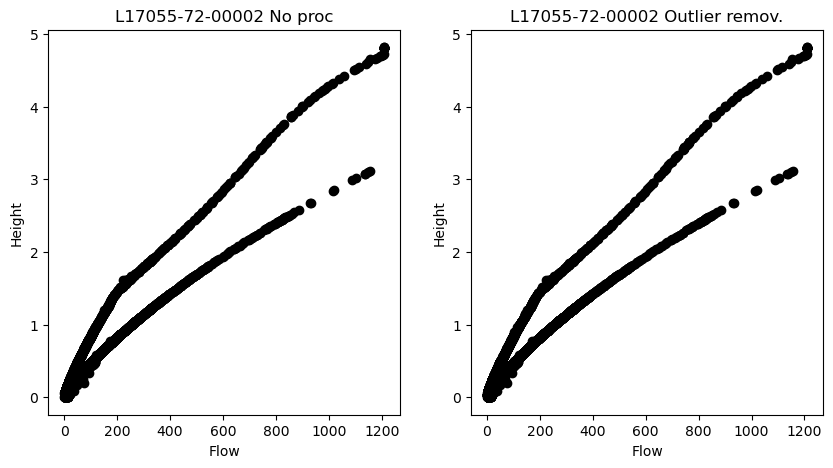

In [10]:
for stationName in flow.columns:
    plotSideBySide(flow,height,flowAux,heightAux,stationName,["No proc", "Outlier remov."])

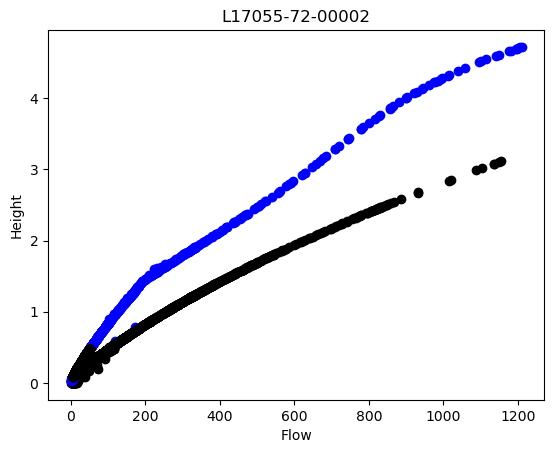

In [73]:
# Two flow-height behaviours in station L17055-72-00002
df = flowAux[["L17055-72-00002"]]
df2 = heightAux[["L17055-72-00002"]]

df = df.rename(columns = {"L17055-72-00002":"L17055-72-00002_flow"})
df2 = df2.rename(columns = {"L17055-72-00002":"L17055-72-00002_height"})

df = df2.combine_first(df)
final = df.dropna()

sector1 = final.loc[: "10/01/2010 00:30:00"] #black
X1 = sector1.iloc[:, :-1].values #flow
y1 = sector1.iloc[:, 1].values #height

sector2 = final.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
X2 = sector2.iloc[:, :-1].values #flow
y2 = sector2.iloc[:, 1].values #height

sector3 = final.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
X3 = sector3.iloc[:, :-1].values #flow
y3 = sector3.iloc[:, 1].values #height

sector4 = final.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
X4 = sector4.iloc[:, :-1].values #flow
y4 = sector4.iloc[:, 1].values #height

sector5 = final.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
X5 = sector5.iloc[:, :-1].values #flow
y5 = sector5.iloc[:, 1].values #height

sector6 = final.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
X6 = sector6.iloc[:, :-1].values #flow
y6 = sector6.iloc[:, 1].values #height

sector7 = final.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
X7 = sector7.iloc[:, :-1].values #flow
y7 = sector7.iloc[:, 1].values #height

sector8 = final.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
X8 = sector8.iloc[:, :-1].values #flow
y8 = sector8.iloc[:, 1].values #height

sector9 = final.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
X9 = sector9.iloc[:, :-1].values #flow
y9 = sector9.iloc[:, 1].values #height

sector10 = final.loc["04/21/2020 00:30:00": ] #blue
X10 = sector10.iloc[:, :-1].values #flow
y10 = sector10.iloc[:, 1].values #height

plt.title("L17055-72-00002")
plt.xlabel('Flow')
plt.ylabel('Height')

plt.scatter(X1, y1, color="black")
plt.scatter(X2, y2, color="blue")
plt.scatter(X3, y3, color="black")
plt.scatter(X4, y4, color="blue")
plt.scatter(X5, y5, color="black")
plt.scatter(X6, y6, color="blue")
plt.scatter(X7, y7, color="black")
plt.scatter(X8, y8, color="blue")
plt.scatter(X9, y9, color="black")
#plt.scatter(X10, y10, color="blue")

plt.show()

In [11]:
flowAux.to_excel("rawdata/ACA/auxdf/df_riverflow_outliersRemoved.xlsx")
heightAux.to_excel("rawdata/ACA/auxdf/df_river_height_outliersRemoved.xlsx")

### Imputing flow values from height equivalents

In [2]:
flow = pd.read_excel("rawdata/ACA/auxdf/df_riverflow_outliersRemoved.xlsx", index_col=0)
height = pd.read_excel("rawdata/ACA/auxdf/df_river_height_outliersRemoved.xlsx", index_col=0)

In [12]:
# we cannot have positive values (>0) for one of the measures, and 0 for the other.
for stationName in flow.columns:
    casA = np.logical_and(flow[stationName]==0, height[stationName] > 0)
    casB = np.logical_and(flow[stationName]>0, height[stationName] == 0)
    print(stationName, np.sum(casA), np.sum(casB))

L17038-72-00002 0 0
L17079-72-00004 0 0
L17079-72-00005 0 0
L08116-72-00002 0 0
F001242 0 0
L17147-72-00005 0 0
F026458 0 0
L17167-72-00001 0 0
L17055-72-00002 0 0


In [13]:
# we cannot have positive values (>0) for one of the measures, and 0 for the other.
for stationName in flow.columns:
    casA = np.logical_and(flow[stationName]==0, height[stationName].isnull())
    casB = np.logical_and(flow[stationName].isnull(), height[stationName] == 0)
    print(stationName, np.sum(casA), np.sum(casB))

L17038-72-00002 0 0
L17079-72-00004 0 0
L17079-72-00005 0 0
L08116-72-00002 0 0
F001242 0 0
L17147-72-00005 0 0
F026458 0 0
L17167-72-00001 0 0
L17055-72-00002 0 0


In [14]:
for stationName in (flow.columns):
    # calculem quans nulls hi han
    n_miss = flow[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / flow.shape[0]
    
    mask = flow[[stationName]].isnull() & height[[stationName]].notnull()
    perc_change = np.sum(mask)/n_miss
    print(stationName, perc.values, perc_change.values)

L17038-72-00002 [0.20580018] [0.42398187]
L17079-72-00004 [0.05591416] [0.06890638]
L17079-72-00005 [0.12512149] [0.0367145]
L08116-72-00002 [0.44959271] [0.28693713]
F001242 [0.12457669] [0.03610538]
L17147-72-00005 [0.17098513] [0.86500472]
F026458 [0.59523799] [0.00676566]
L17167-72-00001 [0.19324794] [0.86616748]
L17055-72-00002 [0.28132287] [0.18406742]


In [15]:
for stationName in (height.columns):
    # calculem quans nulls hi han
    n_miss = height[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / height.shape[0]
    
    mask = flow[[stationName]].notnull() & height[[stationName]].isnull()
    perc_change = np.sum(mask)/n_miss
    print(stationName, perc.values, perc_change.values)

L17038-72-00002 [0.11896304] [0.00351713]
L17079-72-00004 [0.05795826] [0.10174462]
L17079-72-00005 [0.12220135] [0.0136957]
L08116-72-00002 [0.33572465] [0.04508692]
F001242 [0.56772765] [0.78849225]
L17147-72-00005 [0.03344215] [0.30978757]
F026458 [0.61720006] [0.04210831]
L17167-72-00001 [0.03356854] [0.22955077]
L17055-72-00002 [0.2402622] [0.04462504]


When we have a height value, but not a flow value, we use the former to impute the latter.

In [16]:
from sklearn.neighbors import KNeighborsRegressor

def imputeFromHeight(dfflow,dfheight, stationName):
    df_flow = dfflow[[stationName]].copy()
    df_height = dfheight[[stationName]].copy()
    
    # create a df with just flow and height of a single station
    df_flow = df_flow.rename(columns = {stationName:stationName + "_flow"})
    df_height = df_height.rename(columns = {stationName:stationName + "_height"})   
    final = df_height.combine_first(df_flow)

    # a partir de la mascara selecionem les files que flow es null però height no
    mask = final[stationName + "_flow"].isnull() & final[stationName + "_height"].notnull()
    toFill = final[mask]
    if(toFill.shape[0] == 0):
        return dfflow,toFill.shape[0]
    
    print(final.columns)

    # let's remove all instances that we want to make a prediction for
    final = final.dropna()
    X_train = final.iloc[:, 1].values #height
    X_train = X_train.reshape(-1, 1)
    y_train = final.iloc[:, 0].values #flow
        
    # create knn model
    knn = KNeighborsRegressor(n_neighbors=7)
    knn.fit(X_train, y_train)
    
    # predict over toFill
    X_test = toFill.iloc[:, 1].values #height
    X_test = X_test.reshape(-1, 1)
    y_test = knn.predict(X_test)
    
    # create final df combining predicted values (for toFill instances) and original values (for the rest)
    dfPredicted = pd.DataFrame(y_test, columns = [stationName], index = toFill.index )
    dfPredicted = dfflow[[stationName]].combine_first(dfPredicted)
    dfflow[[stationName]] = dfPredicted

    return dfflow, toFill.shape[0]

In [17]:
def imputeFromFlow(dfflow,dfheight, stationName):
    df_flow = dfflow[[stationName]].copy()
    df_height = dfheight[[stationName]].copy()
    
    # create a df with just flow and height of a single station
    df_flow = df_flow.rename(columns = {stationName:stationName + "_flow"})
    df_height = df_height.rename(columns = {stationName:stationName + "_height"})   
    final = df_height.combine_first(df_flow)

    # a partir de la mascara selecionem les files que flow es null però height no
    mask = final[stationName + "_flow"].notnull() & final[stationName + "_height"].isnull()
    toFill = final[mask]
    if(toFill.shape[0] == 0):
        return dfheight,toFill.shape[0]
    
    print(final.columns)

    # let's remove all instances that we want to make a prediction for
    final = final.dropna()
    X_train = final.iloc[:, 0].values #flow
    X_train = X_train.reshape(-1, 1)
    y_train = final.iloc[:, 1].values #height
        
    # create knn model
    knn = KNeighborsRegressor(n_neighbors=7)
    knn.fit(X_train, y_train)
    
    # predict over toFill
    X_test = toFill.iloc[:, 0].values #flow
    X_test = X_test.reshape(-1, 1)
    y_test = knn.predict(X_test)
    
    # create final df combining predicted values (for toFill instances) and original values (for the rest)
    dfPredicted = pd.DataFrame(y_test, columns = [stationName], index = toFill.index )
    dfPredicted = dfheight[[stationName]].combine_first(dfPredicted)
    dfheight[[stationName]] = dfPredicted

    return dfheight, toFill.shape[0]

In [19]:
def imputeFromHeightSpecial(dfflow,dfheight, stationName):
    df_flow = dfflow[[stationName]].copy()
    df_height = dfheight[[stationName]].copy()
    
    # create a df with just flow and height of a single station
    df_flow = df_flow.rename(columns = {stationName:stationName + "_flow"})
    df_height = df_height.rename(columns = {stationName:stationName + "_height"})   
    final = df_height.combine_first(df_flow)
    
    # a partir de la mascara selecionem les files que cabal es null però nivell no
    mask = final[stationName + "_flow"].isnull() & final[stationName + "_height"].notnull()
    toFillall = final[mask]
    if(toFillall.shape[0] == 0):
        return dfflow, toFillall.shape[0]
    
    final.dropna(inplace=True)
    
    sector1 = final.loc[: "10/01/2010 00:30:00"] #black
    sector2 = final.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
    sector3 = final.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
    sector4 = final.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
    sector5 = final.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
    sector6 = final.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
    sector7 = final.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
    sector8 = final.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
    sector9 = final.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
    sector10 = final.loc["04/21/2020 00:30:00": ] #blue
    
    frames1 = [sector1, sector3, sector5,sector7,sector9]
    finalBlack = pd.concat(frames1)
    frames2 = [sector2, sector4, sector6,sector8,sector10]
    finalBlue = pd.concat(frames2)
    
    
    sector1 = toFillall.loc[: "10/01/2010 00:30:00"] #black
    sector2 = toFillall.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
    sector3 = toFillall.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
    sector4 = toFillall.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
    sector5 = toFillall.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
    sector6 = toFillall.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
    sector7 = toFillall.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
    sector8 = toFillall.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
    sector9 = toFillall.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
    sector10 = toFillall.loc["04/21/2020 00:30:00": ] #blue
    
    frames1 = [sector1, sector3, sector5,sector7,sector9]
    toFillBlack = pd.concat(frames1)
    frames2 = [sector2, sector4, sector6,sector8,sector10]
    toFillBlue = pd.concat(frames2)
    
    X_train_bk = finalBlack.iloc[:, 1].values # height
    X_train_bk = X_train_bk.reshape(-1, 1)
    y_train_bk = finalBlack.iloc[:, 0].values # flow
    
    X_train_be = finalBlue.iloc[:, 1].values # height
    X_train_be = X_train_be.reshape(-1, 1)
    y_train_be = finalBlue.iloc[:, 0].values # flow
    
    # create knn model for black periods
    knn = KNeighborsRegressor(n_neighbors=11)
    knn.fit(X_train_bk, y_train_bk)
    
    # predict over toFillBlack
    X_test_bk = toFillBlack.iloc[:, 1].values # height
    X_test_bk = X_test_bk.reshape(-1, 1)
    y_test_bk = knn.predict(X_test_bk)
    
    # create knn model for blue periods
    knn.fit(X_train_be, y_train_be)

    # predict over toFillBlue
    X_test_be = toFillBlue.iloc[:, 1].values # height
    X_test_be = X_test_be.reshape(-1, 1)
    y_test_be = knn.predict(X_test_be)
        
    # create final df combining predicted values (for toFill instances) and original values (for the rest)
    dfPredicted = pd.concat([
        pd.DataFrame(y_test_bk, columns = [stationName], index = toFillBlack.index ),
        pd.DataFrame(y_test_be, columns = [stationName], index = toFillBlue.index )
    ])
    dfPredicted = dfflow[[stationName]].combine_first(dfPredicted)
    dfflow[[stationName]] = dfPredicted
    
    return dfflow, toFillall.shape[0]

In [18]:
def imputeFromFlowSpecial(dfflow,dfheight, stationName):
    df_flow = dfflow[[stationName]].copy()
    df_height = dfheight[[stationName]].copy()
    
    # create a df with just flow and height of a single station
    df_flow = df_flow.rename(columns = {stationName:stationName + "_flow"})
    df_height = df_height.rename(columns = {stationName:stationName + "_height"})   
    final = df_height.combine_first(df_flow)
    
    # a partir de la mascara selecionem les files que cabal es null però nivell no
    mask = final[stationName + "_flow"].notnull() & final[stationName + "_height"].isnull()
    toFillall = final[mask]
    if(toFillall.shape[0] == 0):
        return dfheight, toFillall.shape[0]
    
    final.dropna(inplace=True)
    
    sector1 = final.loc[: "10/01/2010 00:30:00"] #black
    sector2 = final.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
    sector3 = final.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
    sector4 = final.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
    sector5 = final.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
    sector6 = final.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
    sector7 = final.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
    sector8 = final.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
    sector9 = final.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
    sector10 = final.loc["04/21/2020 00:30:00": ] #blue
    
    frames1 = [sector1, sector3, sector5,sector7,sector9]
    finalBlack = pd.concat(frames1)
    frames2 = [sector2, sector4, sector6,sector8,sector10]
    finalBlue = pd.concat(frames2)
    
    
    sector1 = toFillall.loc[: "10/01/2010 00:30:00"] #black
    sector2 = toFillall.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
    sector3 = toFillall.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
    sector4 = toFillall.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
    sector5 = toFillall.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
    sector6 = toFillall.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
    sector7 = toFillall.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
    sector8 = toFillall.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
    sector9 = toFillall.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
    sector10 = toFillall.loc["04/21/2020 00:30:00": ] #blue
    
    frames1 = [sector1, sector3, sector5,sector7,sector9]
    toFillBlack = pd.concat(frames1)
    frames2 = [sector2, sector4, sector6,sector8,sector10]
    toFillBlue = pd.concat(frames2)
    
    
    X_train_bk = finalBlack.iloc[:, 0].values # flow
    X_train_bk = X_train_bk.reshape(-1, 1)
    y_train_bk = finalBlack.iloc[:, 1].values # height
    
    X_train_be = finalBlue.iloc[:, 0].values # flow
    X_train_be = X_train_be.reshape(-1, 1)
    y_train_be = finalBlue.iloc[:, 1].values # height
    
    # create knn model for black periods
    knn = KNeighborsRegressor(n_neighbors=11)
    knn.fit(X_train_bk, y_train_bk)
    
    # predict over toFillBlack
    X_test_bk = toFillBlack.iloc[:, 0].values # flow
    X_test_bk = X_test_bk.reshape(-1, 1)
    y_test_bk = knn.predict(X_test_bk)

    # create knn model for blue periods
    knn.fit(X_train_be, y_train_be)

    # predict over toFillBlue
    X_test_be = toFillBlue.iloc[:, 0].values # flow
    X_test_be = X_test_be.reshape(-1, 1)
    y_test_be = knn.predict(X_test_be)
    
    # create final df combining predicted values (for toFill instances) and original values (for the rest)
    dfPredicted = pd.concat([
        pd.DataFrame(y_test_bk, columns = [stationName], index = toFillBlack.index ),
        pd.DataFrame(y_test_be, columns = [stationName], index = toFillBlue.index )
    ])
    dfPredicted = dfheight[[stationName]].combine_first(dfPredicted)
    dfheight[[stationName]] = dfPredicted
    
    return dfheight, toFillall.shape[0]

In [20]:
flowAux = flow.copy()
for stationName in flow.columns:
    print("##",stationName,"##")
    if (stationName != "L17055-72-00002"):
        flowAux,num = imputeFromHeight(flowAux, height, stationName)

print("## L17055-72-00002 ##")
flowAux,num = imputeFromHeightSpecial(flowAux, height, "L17055-72-00002")

## L17038-72-00002 ##
Index(['L17038-72-00002_flow', 'L17038-72-00002_height'], dtype='object')
## L17079-72-00004 ##
Index(['L17079-72-00004_flow', 'L17079-72-00004_height'], dtype='object')
## L17079-72-00005 ##
Index(['L17079-72-00005_flow', 'L17079-72-00005_height'], dtype='object')
## L08116-72-00002 ##
Index(['L08116-72-00002_flow', 'L08116-72-00002_height'], dtype='object')
## F001242 ##
Index(['F001242_flow', 'F001242_height'], dtype='object')
## L17147-72-00005 ##
Index(['L17147-72-00005_flow', 'L17147-72-00005_height'], dtype='object')
## F026458 ##
Index(['F026458_flow', 'F026458_height'], dtype='object')
## L17167-72-00001 ##
Index(['L17167-72-00001_flow', 'L17167-72-00001_height'], dtype='object')
## L17055-72-00002 ##
## L17055-72-00002 ##


In [21]:
heightAux = height.copy()
for stationName in height.columns:
    print("##",stationName,"##")
    if (stationName != "L17055-72-00002"):
        heightAux,num = imputeFromFlow(flowAux, heightAux, stationName)

print("## L17055-72-00002 ##")
heightAux,num = imputeFromFlowSpecial(flowAux, heightAux, "L17055-72-00002")

## L17038-72-00002 ##
Index(['L17038-72-00002_flow', 'L17038-72-00002_height'], dtype='object')
## L17079-72-00004 ##
Index(['L17079-72-00004_flow', 'L17079-72-00004_height'], dtype='object')
## L17079-72-00005 ##
Index(['L17079-72-00005_flow', 'L17079-72-00005_height'], dtype='object')
## L08116-72-00002 ##
Index(['L08116-72-00002_flow', 'L08116-72-00002_height'], dtype='object')
## F001242 ##
Index(['F001242_flow', 'F001242_height'], dtype='object')
## L17147-72-00005 ##
Index(['L17147-72-00005_flow', 'L17147-72-00005_height'], dtype='object')
## F026458 ##
Index(['F026458_flow', 'F026458_height'], dtype='object')
## L17167-72-00001 ##
Index(['L17167-72-00001_flow', 'L17167-72-00001_height'], dtype='object')
## L17055-72-00002 ##
## L17055-72-00002 ##


In [22]:
for stationName in (flowAux.columns):
    # calculem quans nulls hi han
    n_miss = flowAux[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / flowAux.shape[0]
    
    mask = flowAux[[stationName]].isnull() & height[[stationName]].notnull()
    perc_change = np.sum(mask)/n_miss
    print(perc.values, perc_change.values)

[0.11854464] [0.]
[0.05206131] [0.]
[0.12052772] [0.]
[0.32058786] [0.]
[0.1200788] [0.]
[0.02308219] [0.]
[0.59121081] [0.]
[0.02586286] [0.]
[0.22954049] [0.]


In [23]:
for stationName in (heightAux.columns):
    # calculem quans nulls hi han
    n_miss = heightAux[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / heightAux.shape[0]
    
    mask = flowAux[[stationName]].notnull() & heightAux[[stationName]].isnull()
    perc_change = np.sum(mask)/n_miss
    print(perc.values, perc_change.values)

[0.11854464] [0.]
[0.05206131] [0.]
[0.12052772] [0.]
[0.32058786] [0.]
[0.1200788] [0.]
[0.02308219] [0.]
[0.59121081] [0.]
[0.02586286] [0.]
[0.22954049] [0.]


In [24]:
# we cannot have positive values (>0) for one of the measures, and 0 for the other.
for stationName in flowAux.columns:
    casA = np.logical_and(flowAux[stationName]==0, heightAux[stationName] > 0)
    casB = np.logical_and(flowAux[stationName]>0, heightAux[stationName] == 0)
    #perc_change = np.sum(mask)/n_miss
    print(stationName, np.sum(casA), np.sum(casB))

L17038-72-00002 0 0
L17079-72-00004 0 0
L17079-72-00005 0 0
L08116-72-00002 0 0
F001242 0 0
L17147-72-00005 6 0
F026458 0 84
L17167-72-00001 0 0
L17055-72-00002 0 0


/Users/momo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


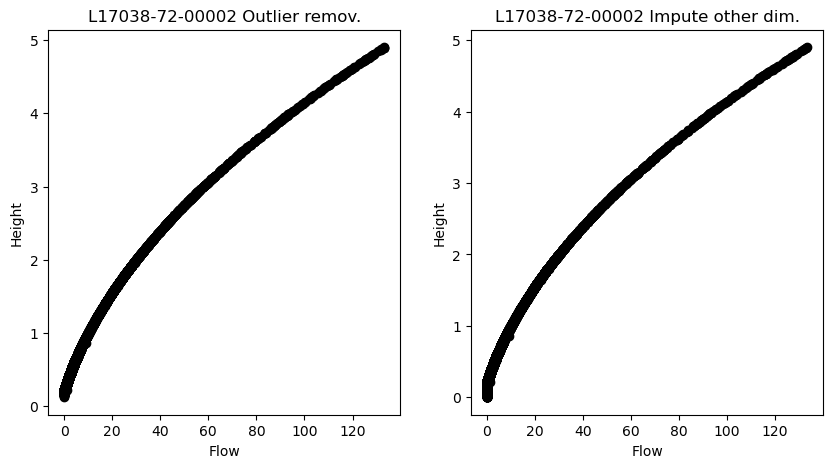

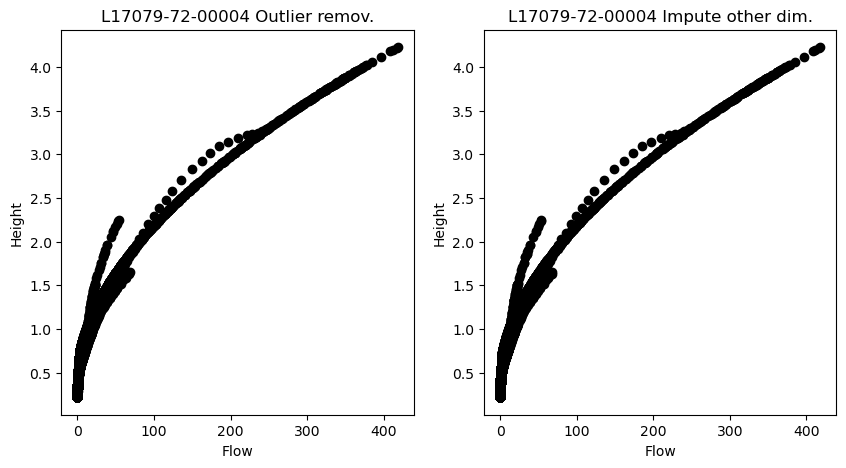

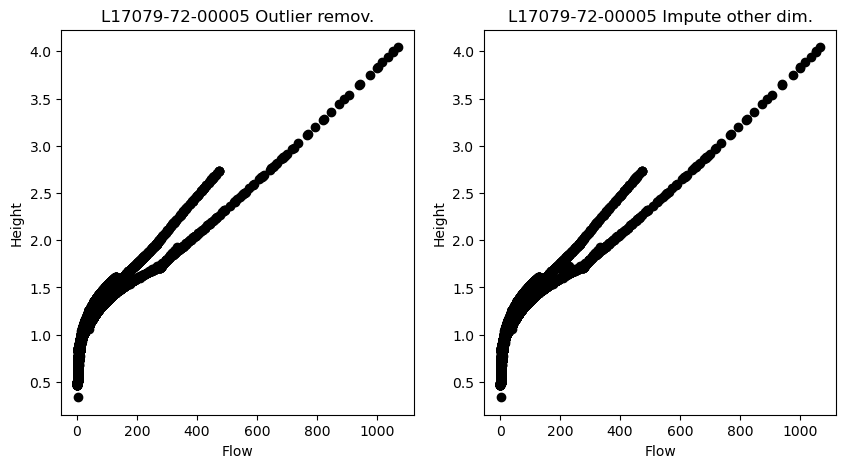

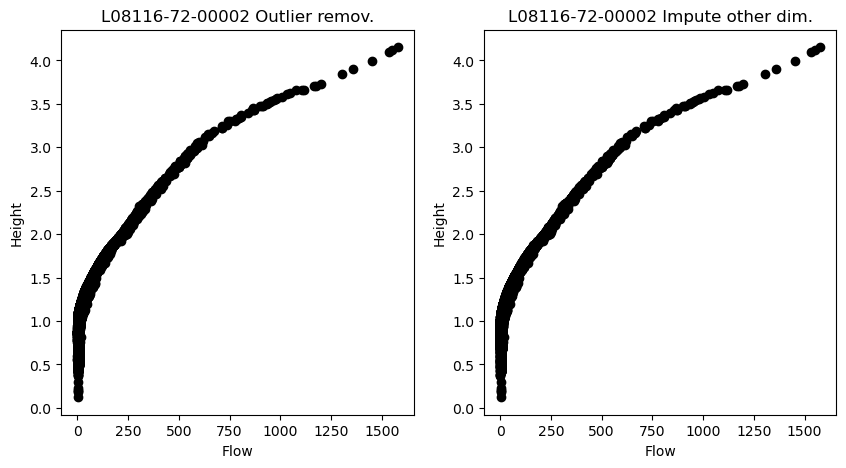

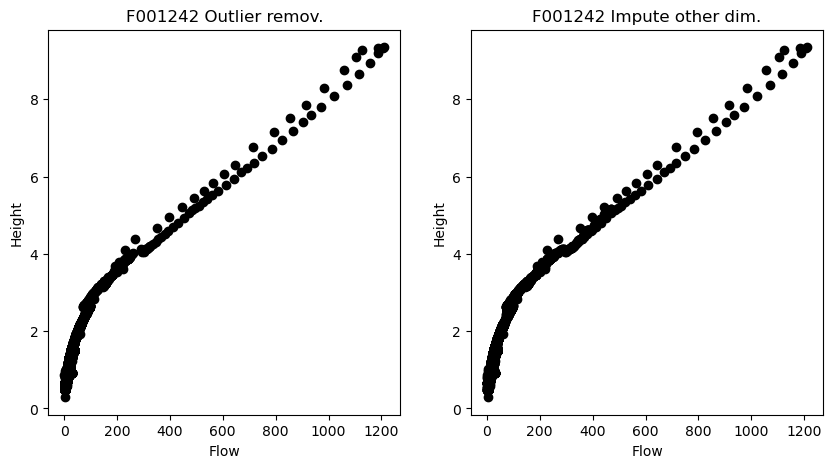

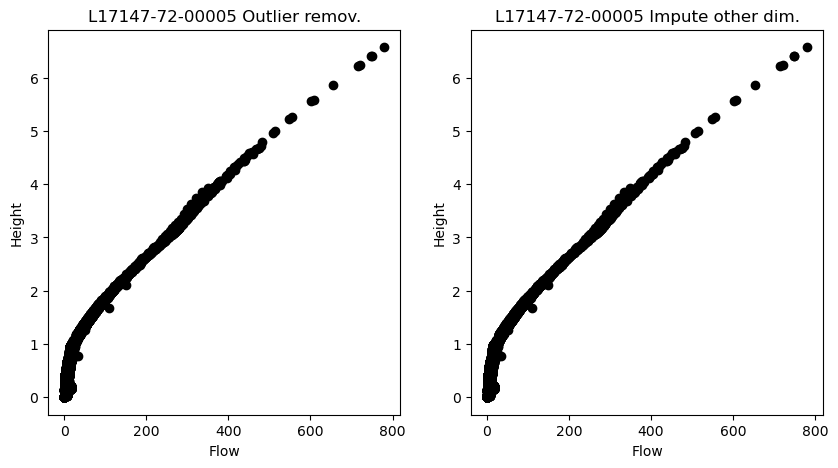

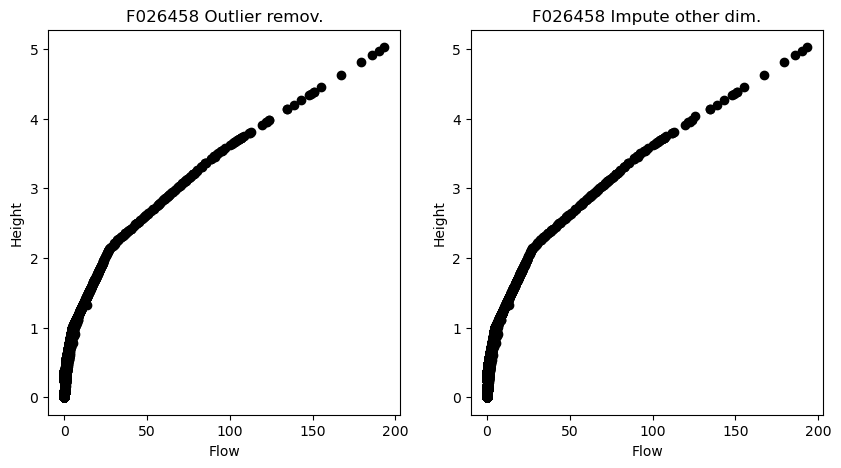

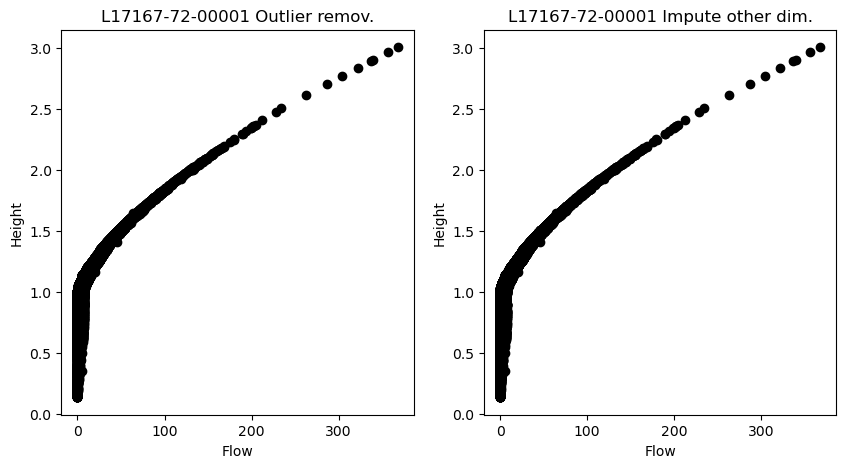

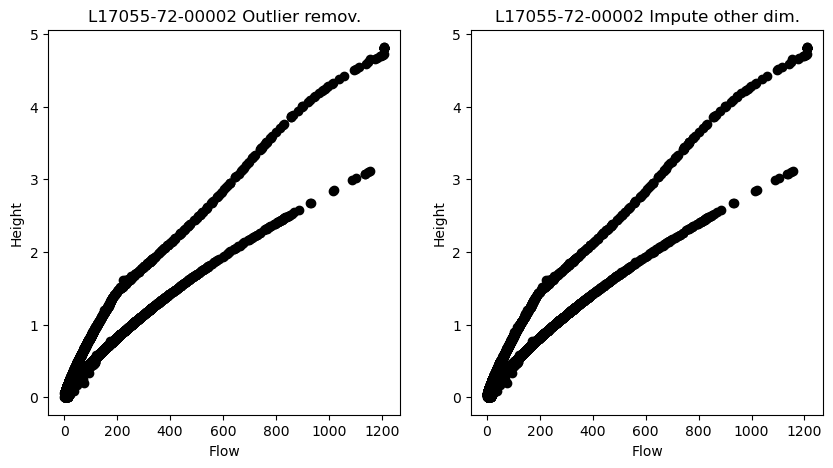

In [25]:
for stationName in flow.columns:
    plotSideBySide(flow,height,flowAux,heightAux,stationName,["Outlier remov.", "Impute other dim."])

In [26]:
flowAux.to_excel("rawdata/ACA/auxdf/df_riverflow_imputationFromHeight.xlsx")
heightAux.to_excel("rawdata/ACA/auxdf/df_river_height_imputationFromFlow.xlsx")

### Interpolating the value of missing points in small gaps

In [ ]:
flow = pd.read_excel("rawdata/ACA/auxdf/df_riverflow_imputationFromHeight.xlsx", index_col=0)
height = pd.read_excel("rawdata/ACA/auxdf/df_river_height_imputationFromFlow.xlsx", index_col=0)

In [29]:
def proc_nans(vec):
    ind_act = -1
    count = 0
    l_vec=[]
    for i in vec:
        if i == ind_act+count:
            count+=1
        else:
            l_vec.append([ind_act,count])
            ind_act = i
            count = 1
    l_vec.append([ind_act,count])
    del l_vec[0]
    return l_vec

In [30]:
def interpolateGapsValue(station,auxiliarDf,maxGapSize):
    # try the correct station
    df = auxiliarDf[[station]]
    # detect null values
    l_nans = proc_nans(np.where(np.isnan(df))[0])
    # find a pattern of null values
    # prepare interpolation
    subset = [range(v[0]-1, v[0]+v[1]+1) 
              for v in l_nans if v[1]<=maxGapSize and v[0]>0 and v[0]+v[1] < auxiliarDf.shape[0]]
    if len(subset) == 0:
        return auxiliarDf
    result = pd.concat([df.iloc[subs,:] for subs in subset], axis = 0)
    result = result[~result.index.duplicated(keep='first')]
    #interpolation
    result = result.interpolate()
    return result.combine_first(auxiliarDf)

In [35]:
def interpolateGapsValueSpecial(station,auxiliarDf,maxGapSize):
    df = auxiliarDf[[station]]
    sector1 = df.loc[: "10/01/2010 00:30:00"] #black
    sector2 = df.loc["10/01/2010 01:00:00": "03/12/2011 00:30:00"] #blue
    sector3 = df.loc["03/12/2011 01:00:00":"09/16/2014 00:30:00" ] #black
    sector4 = df.loc["09/16/2014 01:00:00":"09/30/2014 00:00:00" ] #blue
    sector5 = df.loc["09/30/2014 00:30:00":"04/11/2018 13:30:00" ] #black
    sector6 = df.loc["04/11/2018 14:00:00":"05/13/2018 07:30:00" ] #blue
    sector7 = df.loc["05/13/2018 08:00:00":"10/23/2019 02:30:00" ] #black
    sector8 = df.loc["10/23/2019 03:00:00":"01/28/2020 00:00:00" ] #blue
    sector9 = df.loc["01/28/2020 00:30:00":"04/21/2020 00:00:00" ] #black
    sector10 = df.loc["04/21/2020 00:30:00": ] #blue
    
    frames1 = [sector1, sector3, sector5,sector7,sector9]
    dfBlack = pd.concat(frames1)
    frames2 = [sector2, sector4, sector6,sector8,sector10]
    dfBlue = pd.concat(frames2)
    
    
    # detect null values
    l_nans = proc_nans(np.where(np.isnan(dfBlack))[0])
    # find a pattern of null values
    # prepare interpolation
    subset = [range(v[0]-1, v[0]+v[1]+1) 
              for v in l_nans if v[1]<=maxGapSize and v[0]>0 and v[0]+v[1] < dfBlack.shape[0]]
    if len(subset) >= 0:
        result = pd.concat([dfBlack.iloc[subs,:] for subs in subset], axis = 0)
        result = result[~result.index.duplicated(keep='first')]
        #interpolation
        result = result.interpolate()
        auxiliarDf = result.combine_first(auxiliarDf)
        
    
    # detect null values
    l_nans = proc_nans(np.where(np.isnan(dfBlue))[0])
    # find a pattern of null values
    # prepare interpolation
    subset = [range(v[0]-1, v[0]+v[1]+1) 
              for v in l_nans if v[1]<=maxGapSize and v[0]>0 and v[0]+v[1] < dfBlue.shape[0]]
    if len(subset) >= 0:
        result = pd.concat([dfBlue.iloc[subs,:] for subs in subset], axis = 0)
        result = result[~result.index.duplicated(keep='first')]
        #interpolation
        result = result.interpolate()
        auxiliarDf = result.combine_first(auxiliarDf)
    
    return auxiliarDf

In [31]:
flowAux = flow.copy()
for stationName in flow.columns:
    if (stationName != "L17055-72-00002"):
        flowAux = interpolateGapsValue(stationName,flowAux,30) # 30 : 2 per hour -> 15 hours

In [36]:
flowAux = interpolateGapsValueSpecial("L17055-72-00002",flowAux,30) # 30 : 2 per hour -> 15 hours

In [32]:
heightAux = height.copy()
for stationName in height.columns:
    if (stationName != "L17055-72-00002"):
        heightAux = interpolateGapsValue(stationName,heightAux,30) # 30 : 2 per hour -> 15 hours

In [37]:
heightAux = interpolateGapsValueSpecial("L17055-72-00002",heightAux,30) # 30 : 2 per hour -> 15 hours

In [38]:
for stationName in (flowAux.columns):
    # calculem quans nulls hi han
    n_miss = flowAux[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / flowAux.shape[0]

    print(stationName, perc.values)

F001242 [0.08738194]
F026458 [0.51518255]
L08116-72-00002 [0.29797639]
L17038-72-00002 [0.10423595]
L17055-72-00002 [0.20122384]
L17079-72-00004 [0.0409735]
L17079-72-00005 [0.10014775]
L17147-72-00005 [0.00988054]
L17167-72-00001 [0.01437407]


In [39]:
for stationName in (heightAux.columns):
    # calculem quans nulls hi han
    n_miss = heightAux[[stationName]].isnull().sum()
    # % de null's
    perc = n_miss / heightAux.shape[0]

    print(stationName, perc.values)

F001242 [0.08738194]
F026458 [0.51518255]
L08116-72-00002 [0.29797639]
L17038-72-00002 [0.10423595]
L17055-72-00002 [0.20122384]
L17079-72-00004 [0.0409735]
L17079-72-00005 [0.10014775]
L17147-72-00005 [0.00988054]
L17167-72-00001 [0.01437407]


/Users/momo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


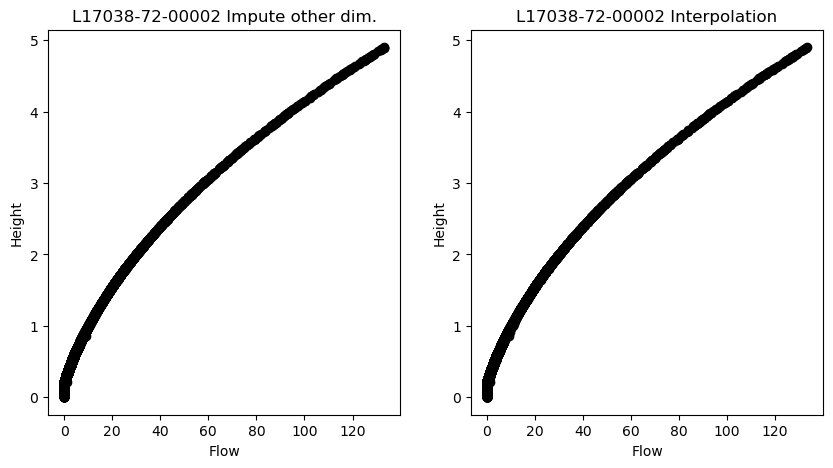

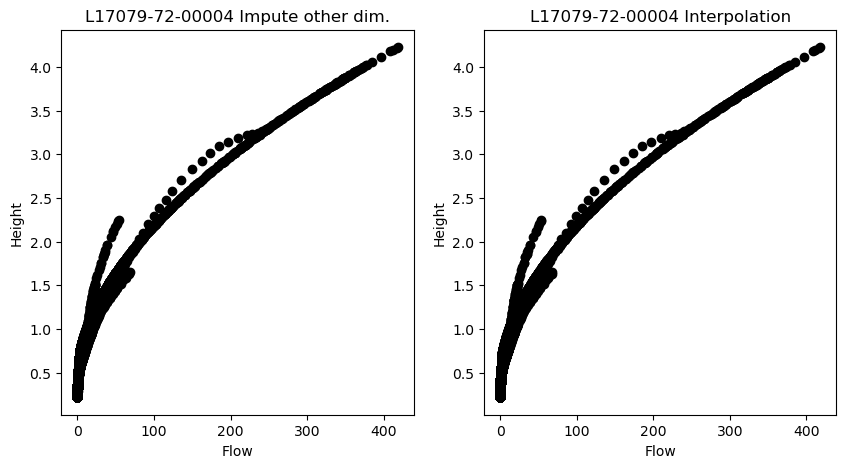

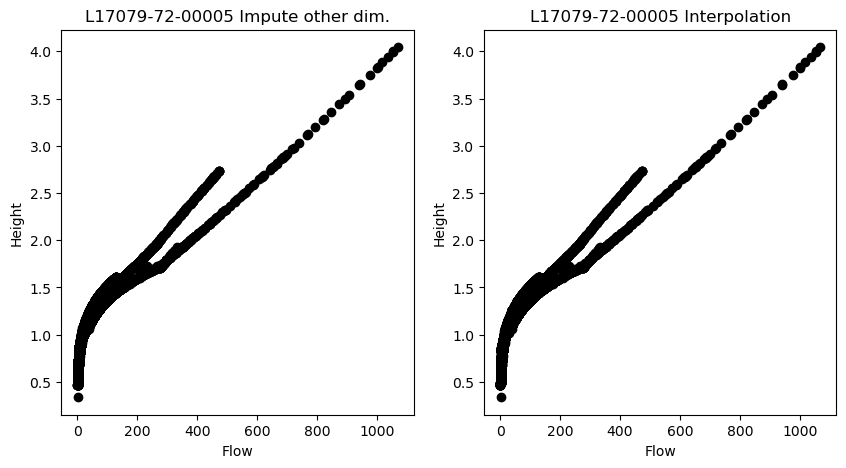

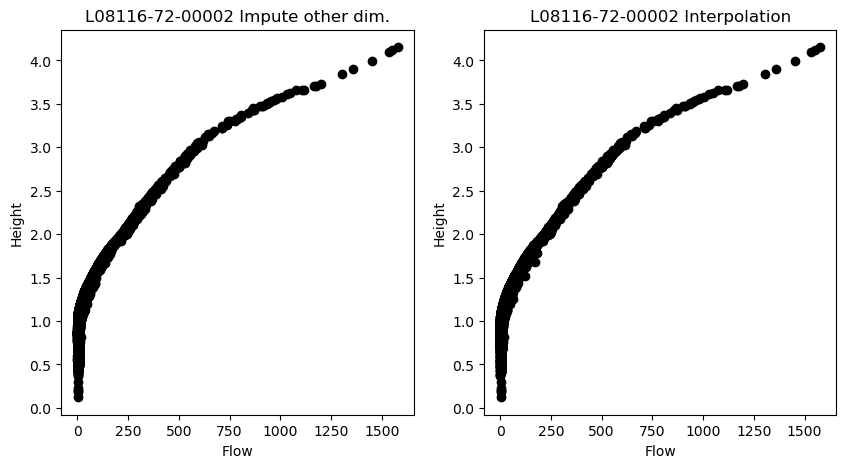

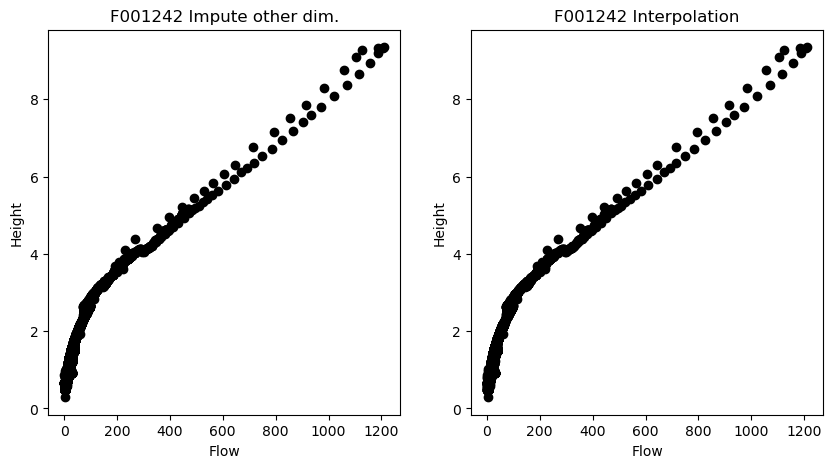

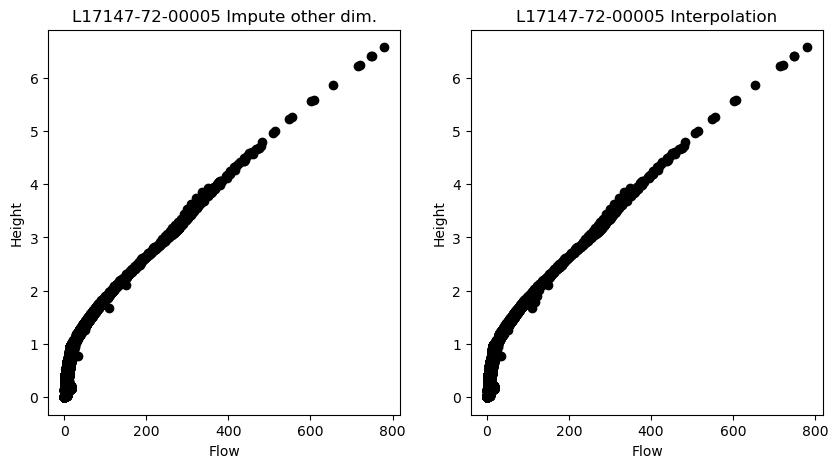

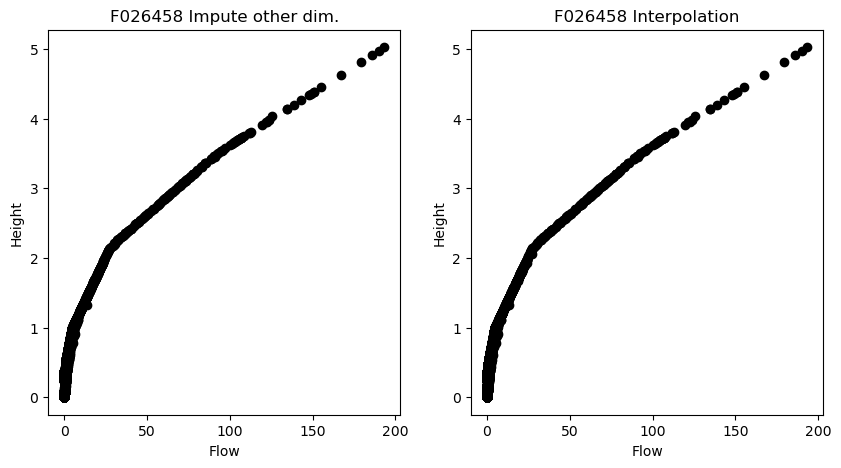

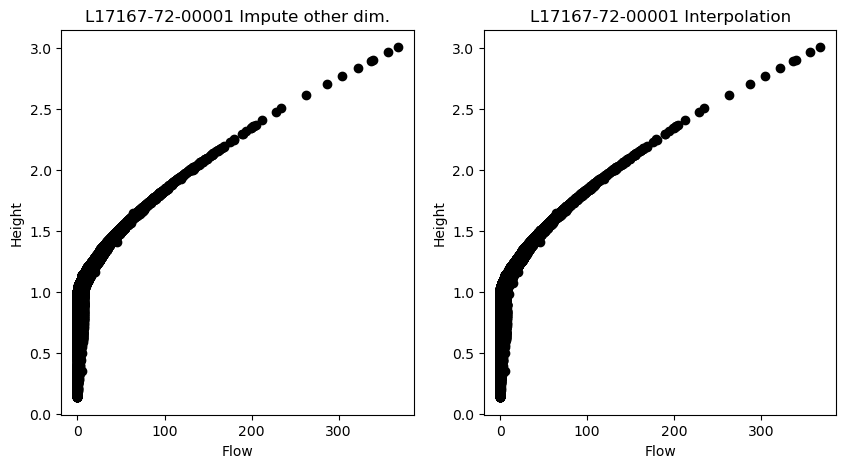

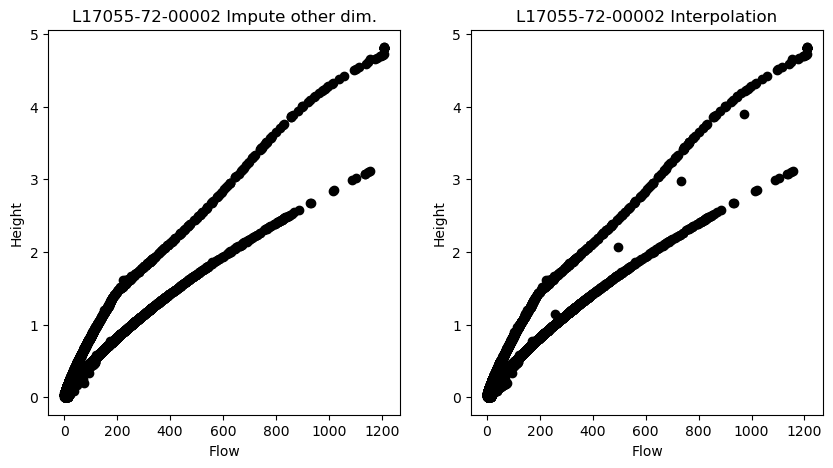

In [40]:
for stationName in flow.columns:
    plotSideBySide(flow,height,flowAux,heightAux,stationName,["Impute other dim.", "Interpolation"])

In [41]:
flowAux.to_excel("rawdata/ACA/auxdf/df_riverflow_smallGapsInterpolated.xlsx")
heightAux.to_excel("rawdata/ACA/auxdf/df_river_height_smallGapsInterpolated.xlsx")

### Iterations 

#### (MovingAverage--> ImputeFromHeight --> Interpolation ) * numIterations


In [42]:
def modelIteration(dfflow,dfheight,numIter):
    win_size=25

    flowAux = dfflow.copy()
    heightAux = dfheight.copy()
    for it in np.arange(numIter):
        for stationName in flow.columns:
            if (stationName != "L17055-72-00002"):
                print(stationName, it)
                df = flowAux[[stationName]]
                # detect outliers
                smoothed = df.rolling(window = win_size, center=True, min_periods=win_size//2+1).apply(largerthan)
                smoothed[:win_size//2] = df[:win_size//2]
                smoothed[-win_size//2+1:] = df[-win_size//2+1:]
                flowAux[[stationName]] = smoothed
                
                df = heightAux[[stationName]]
                # detect outliers
                smoothed = df.rolling(window = win_size, center=True, min_periods=win_size//2+1).apply(largerthan)
                smoothed[:win_size//2] = df[:win_size//2]
                smoothed[-win_size//2+1:] = df[-win_size//2+1:]
                heightAux[[stationName]] = smoothed

                flowAux,_ = imputeFromHeight(flowAux, heightAux, stationName)
                heightAux,_ = imputeFromFlow(flowAux, heightAux, stationName)
        
                flowAux = interpolateGapsValue(stationName,flowAux,win_size)
                heightAux = interpolateGapsValue(stationName,heightAux,win_size)

        stationName = "L17055-72-00002"
        print(stationName, it)
        df = flowAux[[stationName]]
        # detect outliers
        smoothed = df.rolling(window = win_size, center=True, min_periods=win_size//2+1).apply(largerthan)
        smoothed[:win_size//2] = df[:win_size//2]
        smoothed[-win_size//2+1:] = df[-win_size//2+1:]
        flowAux[[stationName]] = smoothed
        
        df = heightAux[[stationName]]
        # detect outliers
        smoothed = df.rolling(window = win_size, center=True, min_periods=win_size//2+1).apply(largerthan)
        smoothed[:win_size//2] = df[:win_size//2]
        smoothed[-win_size//2+1:] = df[-win_size//2+1:]
        heightAux[[stationName]] = smoothed

        flowAux,_ = imputeFromHeightSpecial(flowAux, heightAux, stationName)
        heightAux,_ = imputeFromFlowSpecial(flowAux, heightAux, stationName)

        flowAux = interpolateGapsValue(stationName,flowAux, win_size)
        heightAux = interpolateGapsValue(stationName,heightAux,win_size)
    return flowAux, heightAux
            

In [10]:
flow = pd.read_excel("rawdata/ACA/auxdf/df_riverflow_smallGapsInterpolated.xlsx", index_col=0)
height = pd.read_excel("rawdata/ACA/auxdf/df_river_height_smallGapsInterpolated.xlsx", index_col=0)

In [46]:
flowAux,heightAux = modelIteration(flow, height, 4)

F001242 0
Index(['F001242_flow', 'F001242_height'], dtype='object')
Index(['F001242_flow', 'F001242_height'], dtype='object')
F026458 0
Index(['F026458_flow', 'F026458_height'], dtype='object')
Index(['F026458_flow', 'F026458_height'], dtype='object')
L08116-72-00002 0
Index(['L08116-72-00002_flow', 'L08116-72-00002_height'], dtype='object')
Index(['L08116-72-00002_flow', 'L08116-72-00002_height'], dtype='object')
L17038-72-00002 0
Index(['L17038-72-00002_flow', 'L17038-72-00002_height'], dtype='object')
Index(['L17038-72-00002_flow', 'L17038-72-00002_height'], dtype='object')
L17079-72-00004 0
Index(['L17079-72-00004_flow', 'L17079-72-00004_height'], dtype='object')
Index(['L17079-72-00004_flow', 'L17079-72-00004_height'], dtype='object')
L17079-72-00005 0
Index(['L17079-72-00005_flow', 'L17079-72-00005_height'], dtype='object')
Index(['L17079-72-00005_flow', 'L17079-72-00005_height'], dtype='object')
L17147-72-00005 0
Index(['L17147-72-00005_flow', 'L17147-72-00005_height'], dtype='o

In [47]:
# percentage of null values
np.sum(flowAux.isna(),axis=0)/flowAux.shape[0]

F001242            0.087382
F026458            0.517301
L08116-72-00002    0.297976
L17038-72-00002    0.104236
L17055-72-00002    0.201333
L17079-72-00004    0.040973
L17079-72-00005    0.100148
L17147-72-00005    0.009881
L17167-72-00001    0.014374
dtype: float64

In [48]:
np.sum(heightAux.isna(),axis=0)/heightAux.shape[0]

F001242            0.087382
F026458            0.517301
L08116-72-00002    0.297976
L17038-72-00002    0.104236
L17055-72-00002    0.201333
L17079-72-00004    0.040973
L17079-72-00005    0.100148
L17147-72-00005    0.009881
L17167-72-00001    0.014374
dtype: float64

In [49]:
flowAux.to_excel("rawdata/ACA/auxdf/df_riverflow_iterativePreproc.xlsx")
heightAux.to_excel("rawdata/ACA/auxdf/df_river_height_iterativePreproc.xlsx")

## Final preprocessing: imputation of remaining
Two versions: iterative imputer or KNN imputer. Use one of them only.

In [3]:
flow = pd.read_excel("rawdata/ACA/auxdf/df_riverflow_iterativePreproc.xlsx", index_col=0)

In [52]:
flow = flow.loc["01/01/2009  0:00:00": "01/01/2021  0:00:00"] #blue
ucourse_stations = ['L08116-72-00002', 'L17147-72-00005','L17167-72-00001']
lcourse_stations = ['L17038-72-00002', 'L17079-72-00004', 'L17079-72-00005', 'F001242', 'F026458', 'L17055-72-00002']
flowUpper = flow[ucourse_stations]
flowLower = flow[lcourse_stations]

In [53]:
np.sum(flowUpper.isna(),axis=0)/flowUpper.shape[0]

L08116-72-00002    0.317665
L17147-72-00005    0.003475
L17167-72-00001    0.001526
dtype: float64

In [54]:
np.sum(flowLower.isna(),axis=0)/flowLower.shape[0]

L17038-72-00002    0.043634
L17079-72-00004    0.002472
L17079-72-00005    0.109214
F001242            0.087996
F026458            0.494113
L17055-72-00002    0.129215
dtype: float64

### Iterative imputer

In [ ]:
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

imputer = IterativeImputer(random_state=42,estimator=KNeighborsRegressor(),max_iter=100)

imputedUpper = imputer.fit_transform(flowUpper)
imputedLower = imputer.fit_transform(flowLower)

In [29]:
df_imputedUpper = pd.DataFrame(imputedUpper, columns=ucourse_stations,
                               index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedUpper.index.name = "DATA"

df_imputedLower = pd.DataFrame(imputedLower, columns=lcourse_stations,
                               index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedLower.index.name = "DATA"

In [31]:
df_imputedUpper.to_excel("rawdata/ACA/ACA_upper_course_iter.xlsx")
df_imputedLower.to_excel("rawdata/ACA/ACA_lower_course_iter.xlsx")

### KNN Imputer

In [55]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7)

imputedUpper = imputer.fit_transform(flowUpper)
imputedLower = imputer.fit_transform(flowLower)

In [56]:
df_imputedUpper = pd.DataFrame(imputedUpper, columns=ucourse_stations,
                               index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedUpper.index.name = "DATA"

df_imputedLower = pd.DataFrame(imputedLower, columns=lcourse_stations,
                               index=pd.date_range("2009-01-01", periods=210385, freq="30T"))
df_imputedLower.index.name = "DATA"

In [57]:
df_imputedUpper.to_excel("rawdata/ACA/ACA_upper_course_KNN.xlsx")
df_imputedLower.to_excel("rawdata/ACA/ACA_lower_course_KNN.xlsx")